<a href="https://colab.research.google.com/github/molecular-mar/B1-Procesamiento-de-Datos-con-Python-2020-2021/blob/master/AnalisisBedu19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Presentación proyecto Bedu Equipo 19
# Cambio climático y energías renovables - análisis de datos

## Miembros del equipo:

* Miguel Ángel Romero Hernández
* Adrian Reyes Cruz
* Gustavo Adolfo Bonilla González
* Marcos Rivera Almazo

---
 


# Planteamiento del problema

En este trabajo buscaremos encontrar cuál es la relación entre el aumento en el uso de energías renovables y la posibilidad de disminuir los niveles de CO<sub>2</sub>. Durante el módulo de Procesamiento de Datos realizamos la limpieza de algunos conjuntos de datos útiles para este proyecto. Puedes consultar el notebook correspondiente en este [enlace](https://colab.research.google.com/drive/1IHZGpVQI9Jnt9pHKMzr1kTRDvEkzWS-8?usp=sharing)


# Preguntas planteadas

Deseamos responder algunas preguntas sobre esta problemática, para aumentar nuestro entendimiento sobre la misma:

1. ¿Existe una relación entre el consumo de energía y la producción de CO2? 

1. ¿Cuáles son los países con mayor capacidad de producción de energía total? 

1. ¿Qué fracción de esa energía proviene de energías renovables? 

1. ¿Cuáles países emiten la mayor cantidad de CO<sub>2</sub> entre 2000 y 2018? 

1. ¿Cuál es la relación con el tamaño de su población? 

1. ¿Cuál país emite la mayor cantidad de CO<sub>2</sub> per cápita? 

1. ¿Los países con mayor consumo de energía renovable han disminuido o desacelerado su producción de CO<sub>2</sub> en los últimos años? 

1. ¿Qué tanta incertidumbre hay en la medida estadística usada para responder las preguntas anteriores?

 

Todas estas preguntas fueron contestadas hasta cierto punto en el notebook del procesamiento de datos, pero buscaremos encontrar más información con las técnicas de análisis aprendidas.



# Colección de datos

Dadas las preguntas planteadas, podemos establecer que necesitamos la siguiente información:

* Por país:
  * Consumo Energético (CE)
  * Cantidad de Energía Producida (CEP)
  * Combustibles fósiles o energía no renovable utilizada (en volúmen o por valor energético)
  * Continente
  * CE proveniente de energías renovables
  * Emisiones de CO<sub>2</sub>
  * Población total

Dadas las últimas dos preguntas, necesitariamos la información mencionada a lo largo de un lapso temporal.

La recolección de estos datos individualmente puede resultar complicada, por lo que será necesario contemplar más de una fuente. Los conjuntos de datos de fuentes confiables que hemos encontrado con esta información son:

* https://datasets.wri.org/dataset/globalpowerplantdatabase 
  * Contiene información sobre plantas de energía de distintos países. Actualizada hasta 2021.
* https://www.kaggle.com/datasets/lobosi/c02-emission-by-countrys-grouth-and-population?resource=download 
  * Datos de la Administración de Energía de los Estados Unidos que incluyen las emisiones de CO<sub></sub>2, la producción y el consumo de cada tipo de fuente de energía principal de cada país, la población, la intensidad energética per cápita (persona) y la intensidad energética por PIB (PIB por persona), desde 1980 hasta 2020. 






---
# Procesamiento de datos

In [2]:
#Para graficar mapas
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 784 kB/s 
     |████████████████████████████████| 6.3 MB 18.8 MB/s 


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import colors
import geopandas as gpd
import openpyxl

In [4]:
# Importación de archivos CSV
df_fabricas = pd.read_csv('https://raw.githubusercontent.com/ARC4300/P2BEDU/master/global_power_plant_database.csv', encoding = 'utf8', skipinitialspace= True)
df_paises = pd.read_csv('https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv', encoding = 'utf8', skipinitialspace= True)
df_energiaP9 = pd.read_csv('https://raw.githubusercontent.com/molecular-mar/proyectoAnalisis19/main/df_energiaP9_propuesta.csv ', encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df_fabricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [6]:
df_energiaP9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17231 entries, 0 to 17230
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      17231 non-null  object 
 1   energy_type                  17231 non-null  object 
 2   year                         17231 non-null  int64  
 3   energy_consumption           17231 non-null  float64
 4   energy_production            17231 non-null  float64
 5   gdp                          17231 non-null  float64
 6   population                   17231 non-null  float64
 7   energy_intensity_per_capita  17231 non-null  float64
 8   energy_intensity_by_gdp      17231 non-null  float64
 9   co2_emission                 17231 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 1.3+ MB


In [7]:
# funciones
def grafica_barras(data, x_axis, y_axis, title='title', x_label='x', y_label='x'):
  sns.set(font_scale = 1.5)
  sns.set_style('white')
  graphic = sns.barplot(
      x=x_axis,
      y=y_axis,
      data=data, 
      palette = 'YlGnBu'
    ).set_title(title, fontsize = 20, weight = 'bold')
  plt.xlabel(x_label, weight = 'bold')
  plt.ylabel(y_label, weight = 'bold')
  graphic.figure.set_size_inches(28,12)
  sns.despine()

def grafica_circular(data, x_axis, y_axis, title='title'):
  labels = data[x_axis]
  sizes = data[y_axis]
  porcent = 100.*sizes/sizes.sum()
  # Colores
  colors = ['#b6d7a8','#ffe599', '#b6b4af', '#e06666', '#d5a6bd','#f6b26b']

  fig1, ax1 = plt.subplots(1, figsize=(15, 12), facecolor='#85C1E9')
  patches, texts = ax1.pie(sizes, colors = colors, startangle=90, wedgeprops={'linewidth':0})

  labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]

  sort_legend = True
  if sort_legend:
      patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                          key=lambda x: x[2],
                                          reverse=True))
  plt.legend(patches, labels, bbox_to_anchor=(1,0.5), loc="center right", bbox_transform=plt.gcf().transFigure,
           fontsize=13)
  plt.title(title,fontweight='bold', fontsize = 24, color = "white")

  # La misma relación de aspecto garantiza que el pastel se dibuje como un círculo
  ax1.axis('equal')  
  plt.tight_layout()
  plt.show()

In [8]:
pd.set_option('display.max_rows', 20)

 #### Pregunta 1. ¿Existe una relación entre el consumo de energía y la producción de CO2?

In [9]:
df_agrupado = df_energiaP9.groupby(['country', 'year']).sum().reset_index()

In [10]:
df_co2vsconsumo = df_agrupado.loc[:,['energy_consumption', 'co2_emission', 'year']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'CO2 emission')

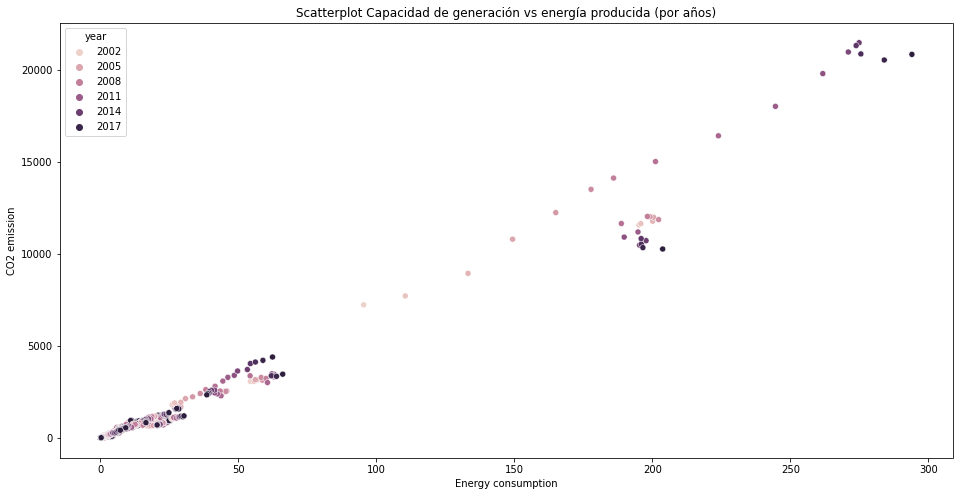

In [11]:
dimensiones = (16, 8)
fig, ax = plt.subplots(figsize=dimensiones)
sns.scatterplot(df_co2vsconsumo['energy_consumption'], df_co2vsconsumo['co2_emission'], c='m', hue = df_co2vsconsumo['year']);
plt.title('Scatterplot Capacidad de generación vs energía producida (por años)')
plt.xlabel('Energy consumption')
plt.ylabel('CO2 emission')


Se nota una relación lineal donde entre mayor sea el consumo de energía, mayor
es la emisión de co2.

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()
consumo = pd.Series(df_co2vsconsumo['energy_consumption'])
co2 = pd.Series(df_co2vsconsumo['co2_emission'])
# Usamos `to_frame` para convertir nuestra Serie en una estructura de 2 dimensiones, como lo requiere el modelo
lr.fit(consumo.to_frame(), co2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Emisión de CO2'),
 Text(0.5, 0, 'Consumo de energía'),
 Text(0.5, 1.0, 'Ajuste de regresión lineal')]

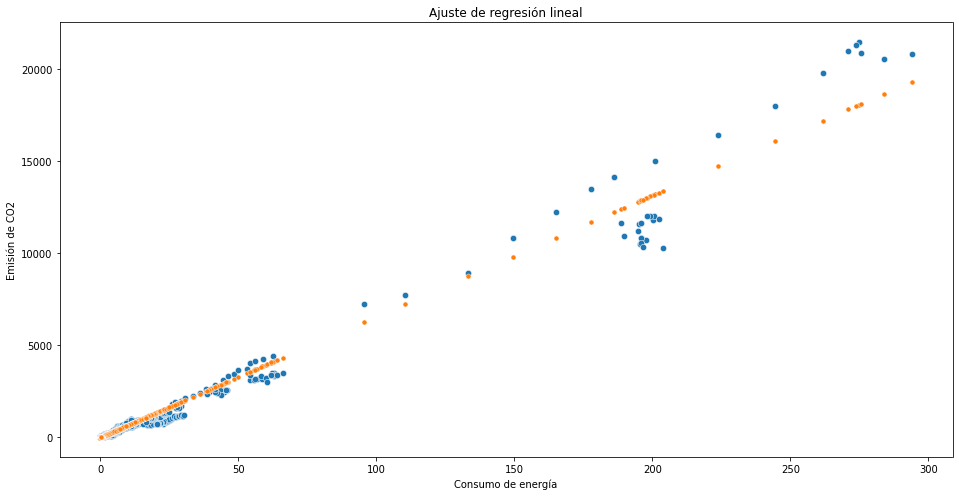

In [14]:
y_predict = lr.predict(consumo.to_frame())
dimensiones = (16, 8)
fig, ax = plt.subplots(figsize=dimensiones)
ax = sns.scatterplot(consumo, co2, s=40);
sns.scatterplot(consumo, y_predict, s=25);
ax.set(xlabel = 'Consumo de energía', ylabel = 'Emisión de CO2', title = 'Ajuste de regresión lineal')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Emisión de CO2'),
 Text(0.5, 0, 'Consumo de energía'),
 Text(0.5, 1.0, 'Ajuste de regresión lineal')]

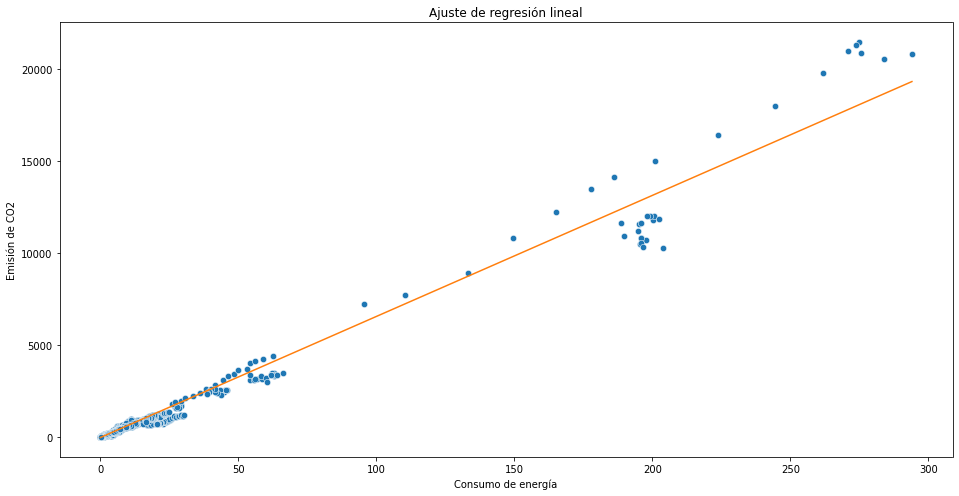

In [15]:
dimensiones = (16, 8)
fig, ax = plt.subplots(figsize=dimensiones)
sns.scatterplot(consumo, co2, s=40);
sns.lineplot(consumo, y_predict, color='#FF7F0E');
ax.set(xlabel = 'Consumo de energía', ylabel = 'Emisión de CO2', title = 'Ajuste de regresión lineal')

In [16]:
intercept = lr.intercept_
coefficient = lr.coef_[0]
print(f'y = {coefficient} * x + {intercept}')

y = 65.82055643790109 * x + -30.67352569376527


In [17]:
lr.score(consumo.to_frame(), co2)

0.9765837790362902

En este caso, la variable consumo explica el 97.65% de la variabilidad de la 
variable co2. 

In [18]:
df_numeric = df_agrupado.drop('year', axis=1)

[Text(0.5, 1.0, 'Matriz de correlaciones')]

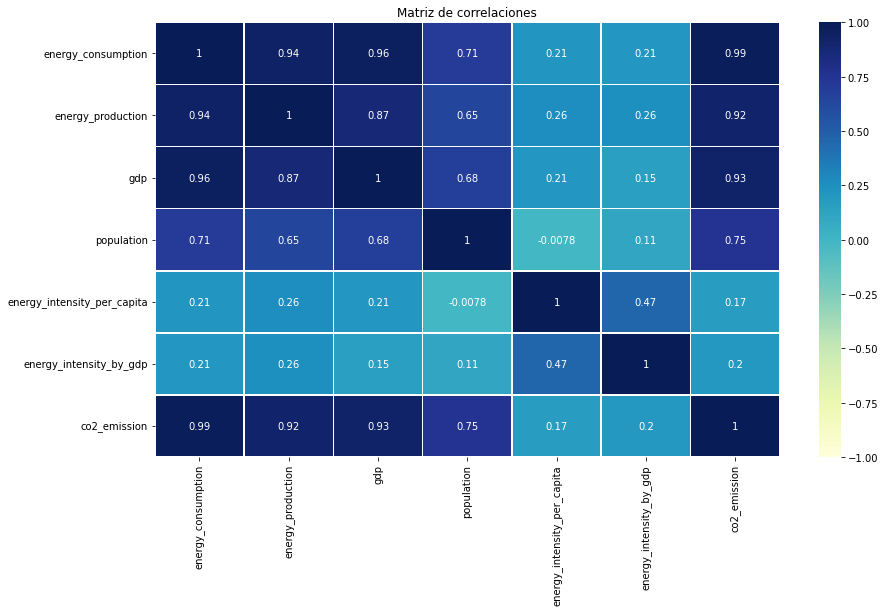

In [19]:
plt.figure(figsize=(14, 8))
ax = sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);
ax.set(title = 'Matriz de correlaciones')


Con la matriz de correlaciones podemos identificar posibles relaciones entre 
las variables. Por ejemplo entre el consumo de energía y la eisión de co2,
el PIB (GDP) y el consumo de energía, el consumo de energía y la producción
de energía.

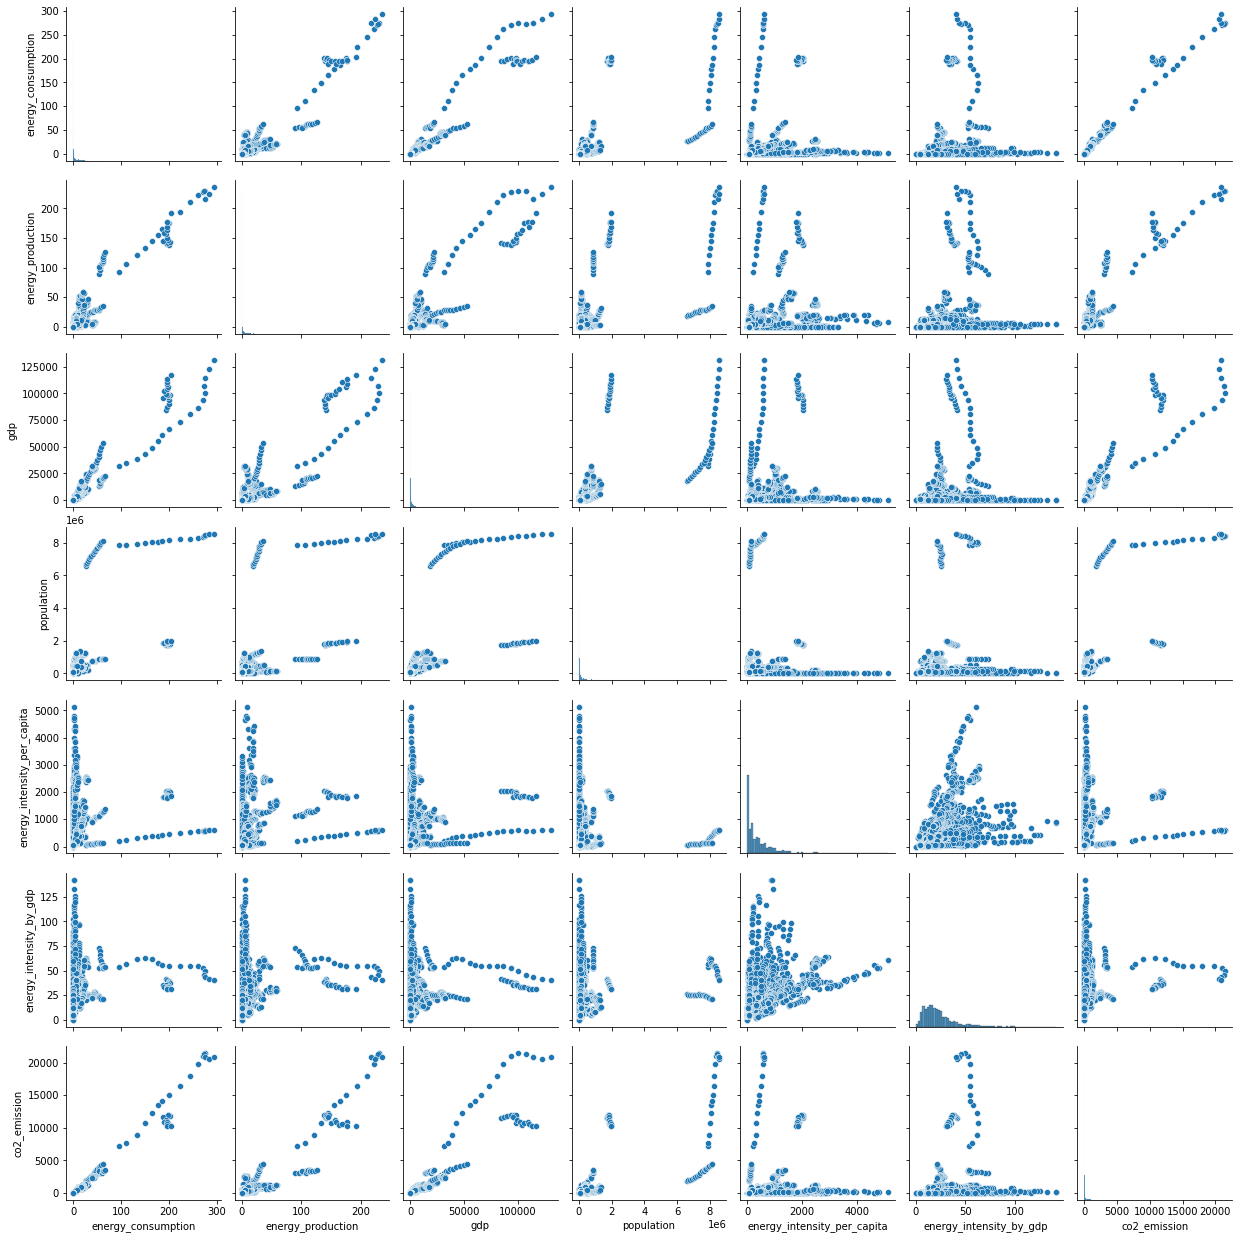

In [20]:
sns.pairplot(df_numeric);

Con el pairplot podemos mostrar de manera visual lo que antes se identificó
mediante la matriz de correlaciones.

#### Pregunta 2. ¿Cuáles son los países con mayor capacidad de producción de energía total?

Para la resolución de esta pregunta, lo que haremos será utilizar las paqueterías geopandas y country_converter para realizar un mapa del mundo donde podemos identificar a los países con mayor capacidad de producción energética.

Primero, realizaremos un breve análisis sobre los datos de consumo de energía registrados en nuestro dataframe. De las fábricas, nos interesa analizar su capacidad de producción por lo cual, iniciaremos revisando los datos de la columna 'capacity_mw'. Solamente tomaremos en cuenta aquellos datos diferentes de 0 o que no sean NAN.

In [21]:
# Revisemos si tenemos datos nulos:
nulos = df_fabricas['capacity_mw'].isnull().sum()
print(nulos)
# Revisemos si tenemos valores de 0:
suma = sum((df_fabricas['capacity_mw'] == 0))
print(suma)

0
0


Ahora, realizaremos un boxplot para analizar la distribución de los datos:

{'whiskers': [<matplotlib.lines.Line2D at 0x7f20370b7b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f203705c1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f20370d0110>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2037018190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2037081610>],
 'means': []}

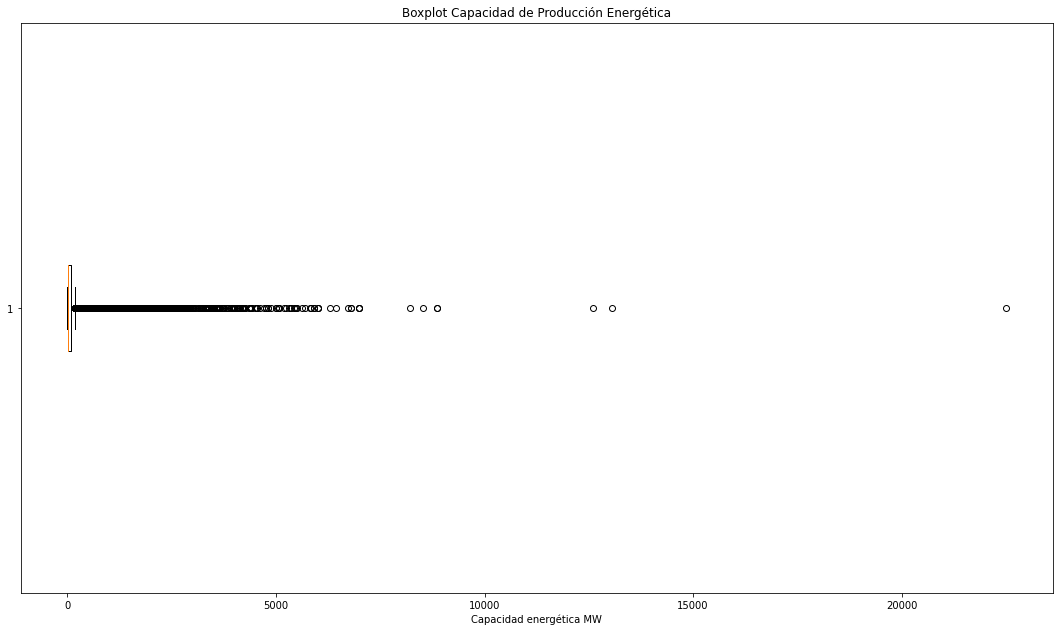

In [22]:
# Realizamos el Boxplot de los datos de Capacidad:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(18.5, 10.5)
ax1.set(xlabel = 'Capacidad energética MW', title = 'Boxplot Capacidad de Producción Energética')
ax1.boxplot(df_fabricas['capacity_mw'], vert = False)

Podemos notar muchos valores atípicos, pero esto es debido a que países como China y Estados Unidos tienen fábricas con grandes capacidades de producción de energía. De cualquier modo, utilizaremos el rango intercuartílico para filtrar valores atípicos.

In [23]:
iqr = df_fabricas['capacity_mw'].quantile(0.75) - df_fabricas['capacity_mw'].quantile(0.25)
filtro_inferior = df_fabricas['capacity_mw'] > df_fabricas['capacity_mw'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df_fabricas['capacity_mw'] < df_fabricas['capacity_mw'].quantile(0.75) + (iqr * 1.5)

df_filtrado = df_fabricas[filtro_inferior & filtro_superior]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, 'Capacidad energética MW'),
 Text(0.5, 1.0, 'Boxplot Capacidad de Producción enérgetica')]

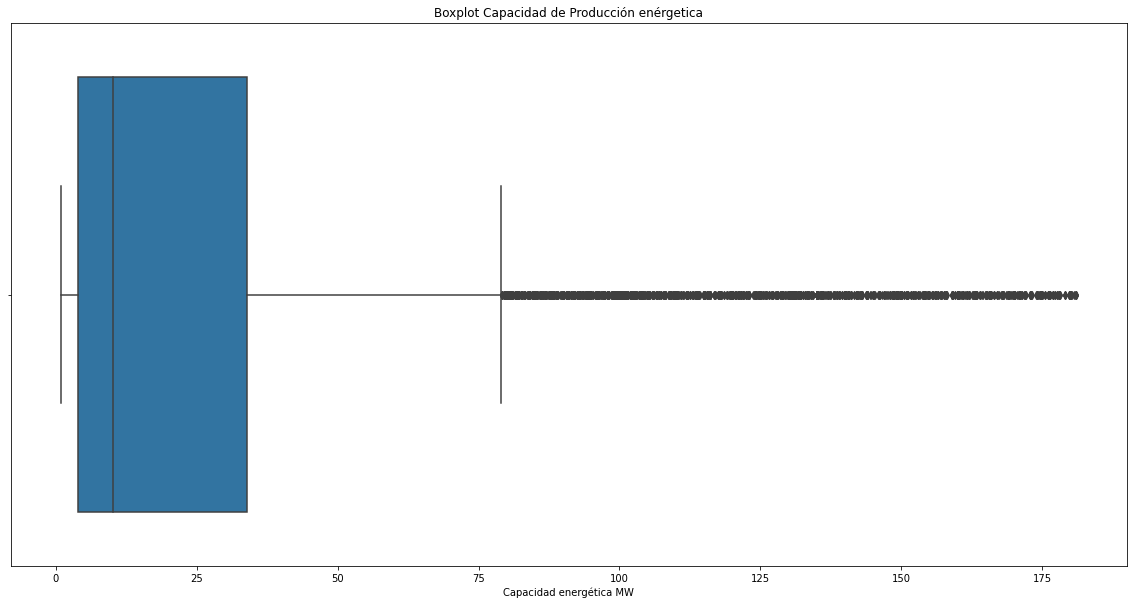

In [24]:
dimensiones = (20, 10)
fig, ax = plt.subplots(figsize=dimensiones)
sns.boxplot(df_filtrado['capacity_mw'])
ax.set(xlabel = 'Capacidad energética MW', title = 'Boxplot Capacidad de Producción enérgetica')

In [25]:
capacidad = df_fabricas['capacity_mw']
print(capacidad.max())
print(capacidad.min())

capacidad.max() - capacidad.min()

22500.0
1.0


22499.0

Podemos notar que hay una diferencia de capacidad de producción de energía de 
22499 mW entre la fábrica con mayor producción y la fábrica con menor producción.

Generamos 10 rangos y obtenemos sus frecuencias.
Podemos notar que la mayoría de las fábricas tienen una capacidad de producción
menor a los 4500 mW.

In [26]:
segmentos = pd.cut(capacidad, 10)
df_fabricas['capacity_mw'].groupby(segmentos).count()

capacity_mw
(-21.499, 2250.9]     34558
(2250.9, 4500.8]        330
(4500.8, 6750.7]         36
(6750.7, 9000.6]          9
(9000.6, 11250.5]         0
(11250.5, 13500.4]        2
(13500.4, 15750.3]        0
(15750.3, 18000.2]        0
(18000.2, 20250.1]        0
(20250.1, 22500.0]        1
Name: capacity_mw, dtype: int64

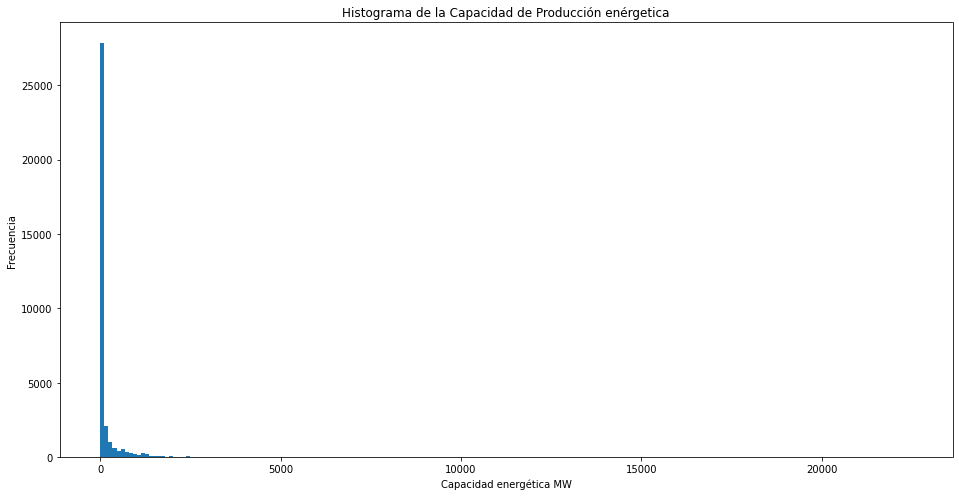

In [27]:
dimensiones = (16, 8)
fig, ax = plt.subplots(figsize=dimensiones)
x = df_fabricas['capacity_mw']
plt.hist(x, bins = 200)
ax.set(xlabel = 'Capacidad energética MW', ylabel = 'Frecuencia', title = 'Histograma de la Capacidad de Producción enérgetica')
plt.show() 

Para que tener una mejor visualización de los datos, consideraremos solo las fábricas con una producción a lo más de 1500 mW.

In [28]:
df_reducido=df_fabricas[df_fabricas.loc[:, "capacity_mw"]<=1500]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Capacidad energética MW'),
 Text(0.5, 1.0, 'Histograma de la Capacidad de Producción enérgetica (reducido)')]

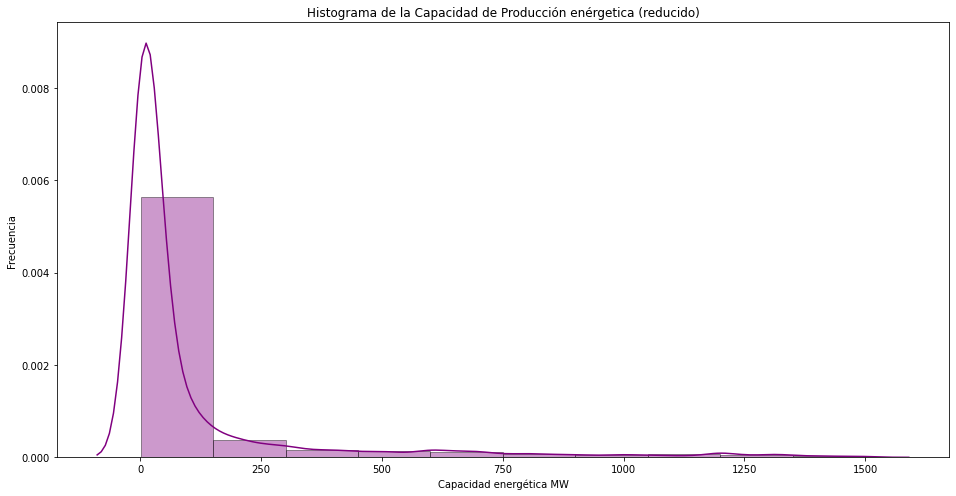

In [29]:
dimensiones = (16, 8)
fig, ax = plt.subplots(figsize=dimensiones)
sns.distplot(df_reducido['capacity_mw'], kde=True, bins = 10, color='purple',
             hist_kws={"edgecolor": 'black'})
ax.set(xlabel = 'Capacidad energética MW', ylabel = 'Frecuencia', title = 'Histograma de la Capacidad de Producción enérgetica (reducido)')

Lo que definitivamente podemos observar es que la distribución tiene una asimetría positiva pues los datos se encuentran más cargados sobre el lado derecho pues las fábricas tienen capacidades "pequeñas" de producción de energía.

In [30]:
df_fabricas['generation_gwh_2019'].shape

(34936,)

In [31]:
nulos = df_fabricas['generation_gwh_2019'].isnull().sum()
print(nulos)

25277


Tenemos 34936 registros pero 25277 son nulos por lo que no sabemos cuánta
energía produjo cada fábrica en 2019, por lo que para ver si hay una relación 
entre las variables, trabajaremos con los registros no nulos.

In [32]:
df_noNulo = df_fabricas[~df_fabricas['generation_gwh_2019'].isnull()]
cap = df_noNulo['capacity_mw'].values
gen = df_noNulo['generation_gwh_2019'].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Energía producida gwh')

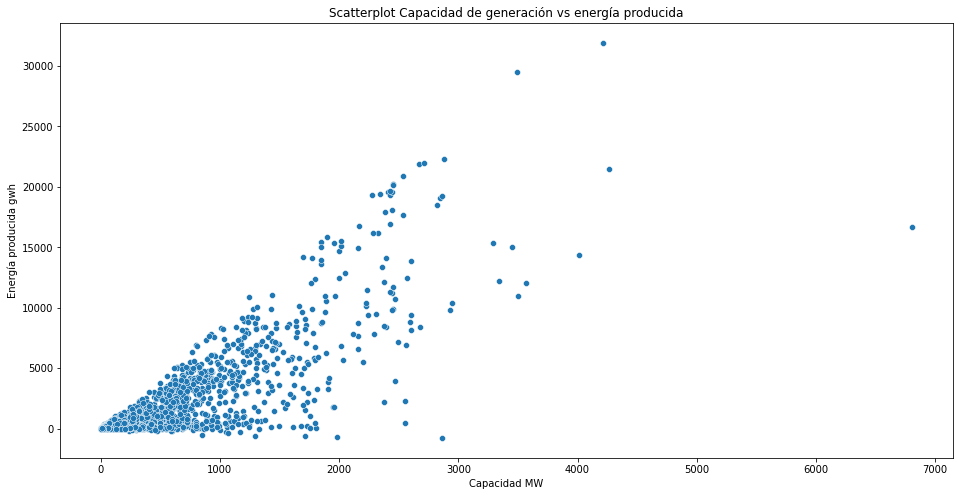

In [33]:
dimensiones = (16, 8)
fig, ax = plt.subplots(figsize=dimensiones)
sns.scatterplot(cap, gen);
plt.title('Scatterplot Capacidad de generación vs energía producida')
plt.xlabel('Capacidad MW')
plt.ylabel('Energía producida gwh')

En cuanto a este scatterplot, podemos notar una correlación positiva, aunque los
las fábricas cuya capacidad de producción es menor 1000 MW no parecen tener
una relación muy clara respecto a la energía producida.

A continuación calculamos la correlación entre amabas variables utilizando la función .corr()
Obtuvimos un coeficiente de correlación de 0.8544 lo cual es cercano a 1, por lo que se puede decir que existe una relación lineal positiva entre la capacidad de producción de energía de una fábrica y la energía que genera. Un aumento en la capacidad podría estar implicando un aumento en la generación de energía eléctrica.

In [34]:
cap = pd.Series(cap)
gen = pd.Series(gen)
print(f'Correlación entre la capacidad de producción y la energía producida: {cap.corr(gen)}')

Correlación entre la capacidad de producción y la energía producida: 0.8544403012458849


Lo siguiente será aplicar un modelo de regresión lineal para intentar ajustar una recta que describa a nuestros datos.

In [35]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

# Usamos `to_frame para convertir nuestra Serie en una estructura de 2 dimensiones
lr.fit(cap.to_frame(), gen)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Energía producida gwh'),
 Text(0.5, 0, 'Capacidad MW'),
 Text(0.5, 1.0, 'Ajuste de regresión lineal')]

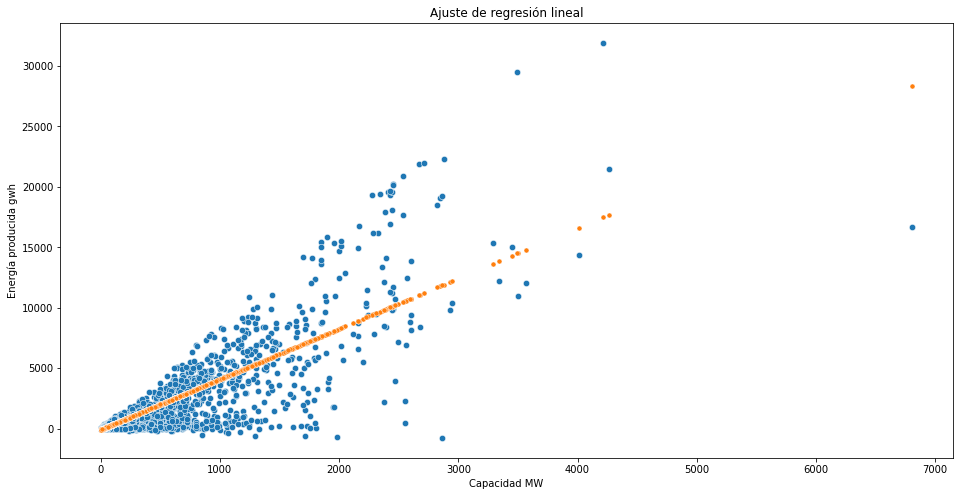

In [38]:
dimensiones = (16, 8)
y_predict = lr.predict(cap.to_frame())
fig, ax = plt.subplots(figsize=dimensiones)
sns.scatterplot(cap, gen, s=40);
sns.scatterplot(cap, y_predict, s=25);
ax.set(xlabel = 'Capacidad MW', ylabel = 'Energía producida gwh', title = 'Ajuste de regresión lineal')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Energía producida gwh'),
 Text(0.5, 0, 'Capacidad MW'),
 Text(0.5, 1.0, 'Ajuste de regresión lineal')]

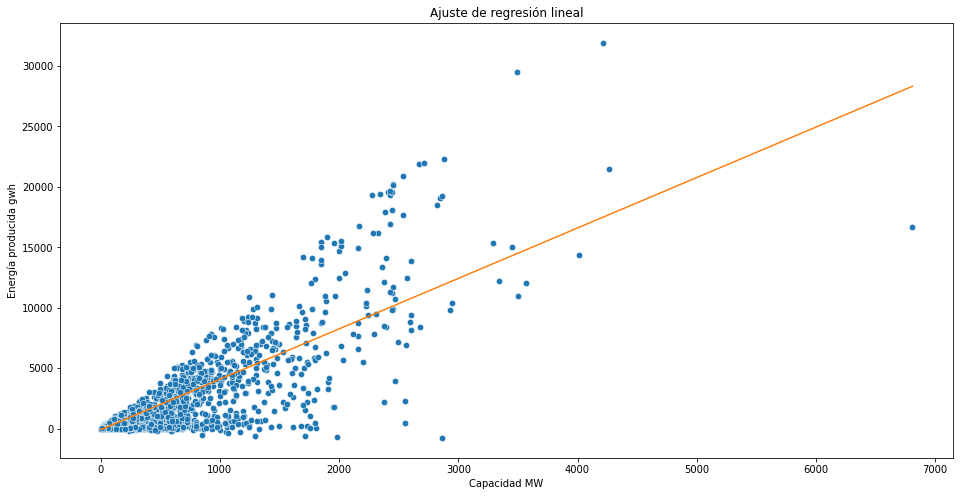

In [39]:
dimensiones = (16, 8)
fig, ax = plt.subplots(figsize=dimensiones)
sns.scatterplot(cap, gen, s=40);
sns.lineplot(cap, y_predict, color='#FF7F0E');
ax.set(xlabel = 'Capacidad MW', ylabel = 'Energía producida gwh', title = 'Ajuste de regresión lineal')

In [40]:
intercept = lr.intercept_
coefficient = lr.coef_[0]
print(f'y = {coefficient} * x + {intercept}')

y = 4.171501083254597 * x + -91.70584759221737


Obtenemos que la ecuación que modela a los datos siguiendo un modelo de regresión lineal es: y = 4.1715x - 91.7058

In [41]:
lr.score(cap.to_frame(), gen)

0.7300682283931588

En este caso, la variable capacidad de producción de energía explica el 
73.0068% de la variabilidad de la variable generación de energía.

Ahora, para estudiar a los países con la mayor capacidad de producción de energía, realizamos lo siguiente:

In [42]:
# Se crea un dataframe a partir de las columnas con el nombre del país, 
# el nombre de la fábrica, su ID y su capacidad:
df_produccion = df_fabricas.loc[:,['country_long', 'name','gppd_idnr','capacity_mw']]

# Notemos que tenemos 34936 renglones.
df_produccion.shape

(34936, 4)

In [43]:
# Veamos si no tenemos valores nulos o repetidos
df_produccion['name'].isnull().sum()
df_produccion['gppd_idnr'].isnull().sum()

# Como obtenemos 0's, significa que no hay valores nulos.

0

In [44]:
# Ahora, veamos que no tengamos fábricas repetidas.
df_produccion['gppd_idnr'].nunique()

# Notemos que tenemos un ID distinto para cada una de las 34936 fábricas

34936

In [45]:
# Lo siguiente que hacemos es agrupar por país para obtener cuál es la capacidad
# energética de cada país.
df_agrupado = df_produccion \
  .groupby('country_long') \
  .sum() \
  .sort_values(by='capacity_mw', ascending = False) \
  .reset_index()
df_agrupado.shape

(167, 2)

In [46]:
# Por cuestiones de visualización añadimos un registro para Chad con valor de 0
df_agrupado.loc[len(df_agrupado.index)] = ['Chad', 0]

# Dataframe con los países con mayor capacidad de producción energética
mayores_productores = df_agrupado[0:10].reset_index()

In [47]:
mayores_productores

,index,country_long,capacity_mw
0,0,China,1.415067e+06
1,1,United States of America,1.204638e+06
2,2,India,3.160885e+05
3,3,Russia,2.282200e+05
4,4,Japan,2.153659e+05
5,5,Brazil,1.475893e+05
6,6,Canada,1.435787e+05
7,7,Germany,1.120404e+05
8,8,France,1.106159e+05
9,9,South Korea,9.947268e+04


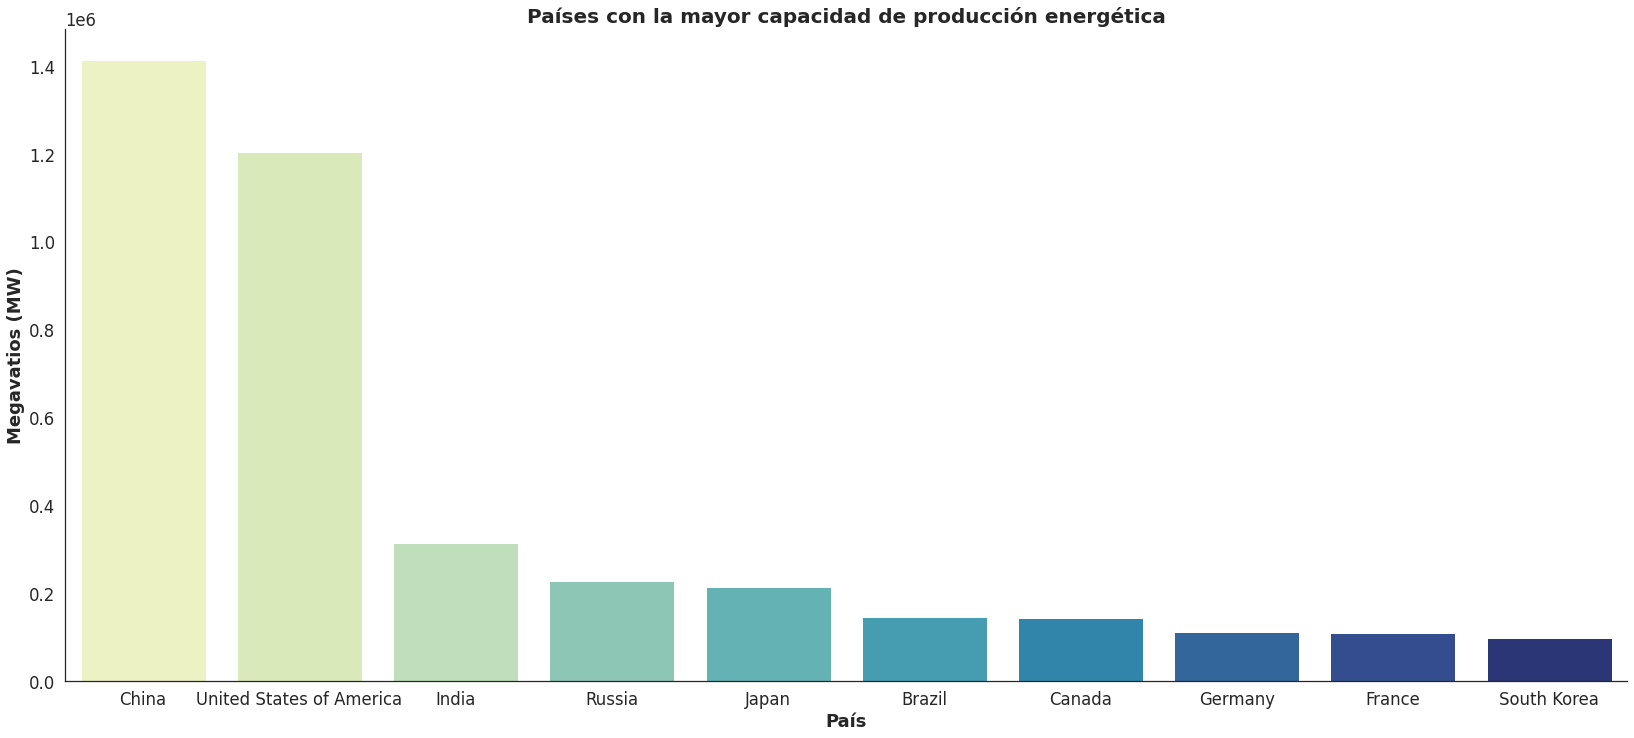

In [48]:
grafica_barras(
    data=mayores_productores,
    x_axis='country_long',
    y_axis='capacity_mw',
    title='Países con la mayor capacidad de producción energética',
    x_label='País',
    y_label='Megavatios (MW)'
)

In [49]:
# Datos de los países y sus áreas (para graficar)
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Nombre de los países y sus coordenadas para graficar
paises = worldmap.loc[:,['name', 'geometry']]
paises = paises.sort_values(by='name', ascending = True)

In [50]:
# Reemplazamos algunos nombres para que coincidan los países del listado de 
# países y los países del listado de fábricas.
paises['name'] = paises['name'].replace({
    'Central African Rep.': 'Central Africa Republic',
    'Côte d\'Ivoire': 'Cote DIvoire',
    'Syria': 'Syrian Arab Republic',
    'Czechia': 'Czech Republic',
    'Bosnia and Herz.': 'Bosnia and Herzegovina',
    'W. Sahara", "name': 'Western Sahara',
    'Dominican Rep.': 'Dominican Republic',
    'Central Africa Republic': 'Central African Republic"',
    'S. Sudan': 'Sudan',
    'Brunei': 'Brunei Darussalam',
    'N. Cyprus': 'Cyprus',
    'Dem. Rep. Congo': 'Democratic Republic of the Congo',
})

In [51]:
# Obtenemos los países del conjunto de países y sus geometry points
nombres_paises = paises['name'].to_list()

# Obtenemos los países del dataset de fábricas de energía
nombres = df_agrupado['country_long'].to_list()
nombres.sort()

In [52]:
# Podemos checar qué países vienen en el mapa, pero no dentro de nuestro listado
# de países con fábricas de energía.
list(set(nombres_paises) - set(nombres))

['Falkland Is.',
 'W. Sahara',
 'Eq. Guinea',
 'Somalia',
 'Central Africa Republic',
 'Bahamas',
 'Fr. S. Antarctic Lands',
 'Somaliland',
 'Belize',
 'Vanuatu',
 'Solomon Is.',
 'Puerto Rico',
 'New Caledonia',
 'Timor-Leste',
 'Haiti',
 'Greenland',
 'eSwatini']

In [53]:
# Notemos que tenemos 15 países adicionales en el mapa que no tienen registros de
# fábricas (serían 16 si no contamos la adición de Chad)
len(list(set(nombres_paises) - set(nombres)))

17

In [54]:
# Si hacemos right join obtendremos 177 registros
df_right = df_agrupado.merge(paises, how='right', left_on="country_long", right_on = "name")
df_right.shape

(177, 4)

In [55]:
# Obtenemos precisamente que 15 registros no tienen datos
df_right[df_right['capacity_mw'].isna()].shape

(17, 4)

In [56]:
# Ahora obtenemos los datos de los 162 países con fábricas de producción energética
# (incluyendo a Chad)
df_merged = df_agrupado.merge(paises, how='inner', left_on="country_long", right_on = "name")
df_merged.shape

(160, 4)

In [57]:
# Quitamos la columna name repetida y renombramos algunas columnas
df_merged = df_merged.drop(['name'], axis=1)
df_merged.rename(columns = {'country_long':'Nombre', 'capacity_mw':'Capacidad'}, inplace = True)

In [58]:
# Convertimos el DataFrame a un GeoDataFrame
geomerged = gpd.GeoDataFrame(df_merged)

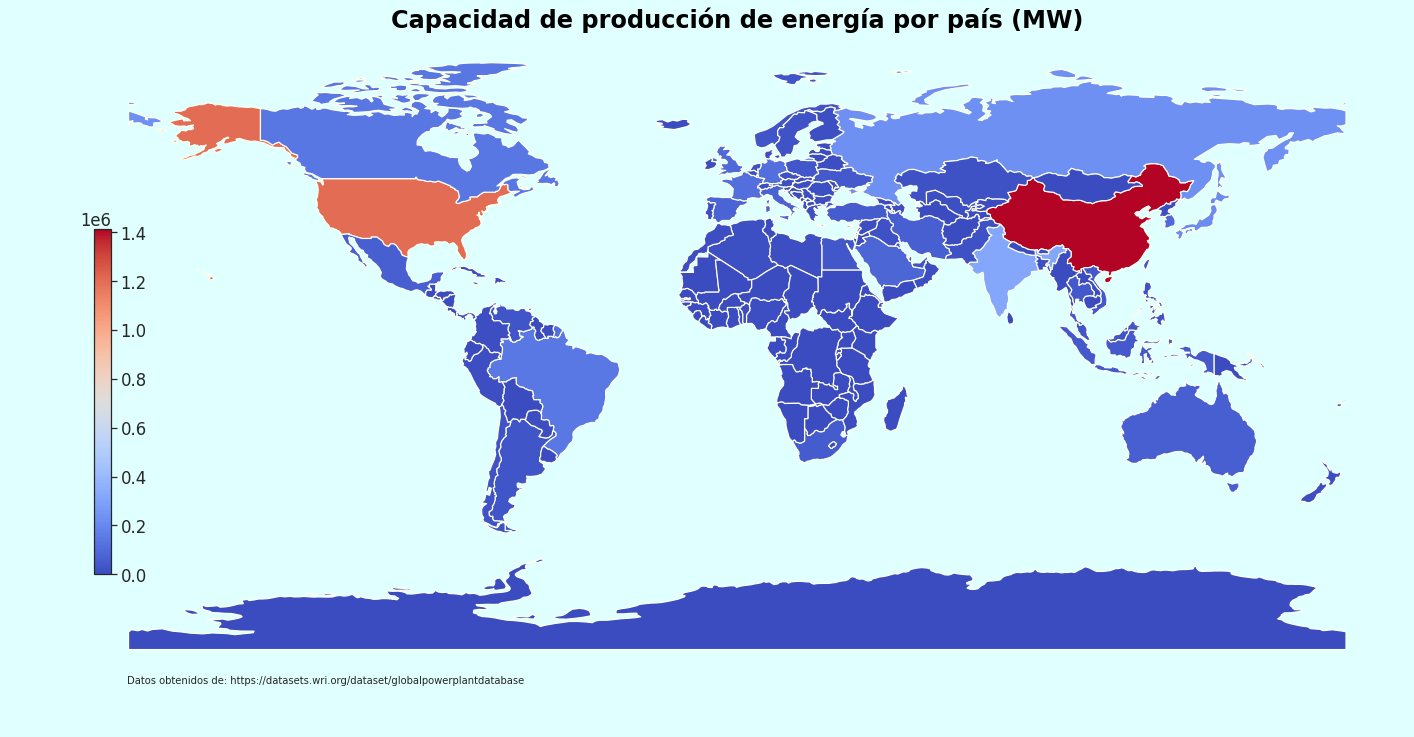

In [59]:
# Creación del mapa
title = 'Capacidad de producción de energía por país (MW)'
col = 'Capacidad'
source = 'Datos obtenidos de: https://datasets.wri.org/dataset/globalpowerplantdatabase'
vmin = geomerged[col].min()
vmax = geomerged[col].max()
cmap = 'coolwarm'

# Creación de la figura and y ejes para Matplotlib
fig, ax = plt.subplots(1, figsize=(24, 12), facecolor='lightcyan')

# Remoción de los ejes
ax.axis('off')
geomerged.plot(column=col, ax=ax, edgecolor='ivory', linewidth=1.2, cmap=cmap)

# Agreagación del titulo
ax.set_title(title, fontdict={'fontsize': '24', 'fontweight': 'bold'}, color = 'black')

# Posición de la leyenda de la fuente de los datos
ax.annotate(source, xy=(0.09, .07), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Barra de colores (leyenda)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Añadimos la barra de colores al mapa
cbaxes = fig.add_axes([0.14, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

Como resultado del analisis realizado, pudimos observar que los países con mayor capacidad de producción energética son: China, Estados Unidos, India, Rusia y Japón. China y Estados Unidos destacando del resto con una capacidad de producción de 1,415,067 megavatios y 1,204,638 megavatios, respectivamente.

#### Pregunta 3. ¿Qué fracción de esa energía proviene de energías renovables?

Para responder a esta pregunta, emplearemos algunas columnas del dataframe df_fabricas con la finalidad de obtener las siguientes informaciones: 
* El porcentaje y número de fábricas que operan con energías renovables y no renovables.
* La capacidad de producción energética de las fábricas que operan con energías renovables y no renovables.
* La energía producida por las fábricas en 2019 según el tipo de energía empleado (renovable y no renovable).
* La capacidad de producción por cada tipo de energía o combustible empleado.

También es necesario considerar que existe una diferencia entre la capacidad de producción de energía y la energía producida por una fábrica. La capacidad es la producción máxima de electricidad que un generador puede producir en condiciones ideales y suele medirse en megavatios o kilovatios. Mientras que la energía generada se refiere a la cantidad de electricidad que se produce durante un periodo de tiempo. Se suele medir en gigavatios-hora, kilovatios-hora, megavatios-hora o teravatios-hora.[14]  


In [60]:
# Revisamos si tenemos datos nulos sobre el principal tipo de combustible empleado
# en las fábricas de produccion de energía
df_fabricas['primary_fuel'].isnull().sum()

0

In [61]:
# Creamos una lista de valores unicos de columna primary_fuel
tipos = df_fabricas['primary_fuel'].unique().tolist()
tipos
print(len(tipos))

15


Dentro de las energías renovables tendremos las siguientes:
* Solar - Solar
* Wind - Eólica
* Biomass - Biomasa
* Wave and Tidal - Oleaje y mareas
* Geothermal - Geotérmica
* Hydro - Energía hidráulica
* Cogeneration - Energía de cogeneración
* Waste - Energía proveniente de residuos

En las energías no renovables tendremos las siguientes:

* Gas - Gas
* Oil - Petróleo
* Nuclear - Energía nuclear
* Coal - Carbón
* Petcoke - Coque de Petróleo 



In [62]:
# Separamos esos 15 tipos de energía en dos listas: Renovables,
# No Renovables. Notemos que existe un tipo "Other" y un tipo "Storage", 
# tales registros no los consideraremos dado que no sabemos qué tipo de
# combustible o energía se utiliza. Existe un debate sobre si la energía 
# obtenida de desechos es renovable pero será considerada como tal.

renovable = ['Solar','Wind','Biomass','Wave and Tidal', 'Geothermal', 'Hydro', 'Cogeneration', 'Waste']
no_renovable = ['Gas', 'Oil','Nuclear', 'Coal', 'Petcoke']

In [63]:
# Creamos una nueva columna para determinar si la energía es renovable, 
# no renovable o no establecido
tipoEnergia = []
for i in df_fabricas["primary_fuel"]:
    if i in renovable:
        tipoEnergia.append("Renovable")
    elif i in no_renovable:
        tipoEnergia.append("No Renovable")
    else:
        tipoEnergia.append("Desconocido")
      
df_fabricas["TipoEnergía"] = tipoEnergia  

In [64]:
df_energia = pd.DataFrame(df_fabricas[["TipoEnergía"]])
df_energia = df_energia.groupby(['TipoEnergía']).size()
df_energia = pd.DataFrame(df_energia).reset_index()
df_energia.columns = ['Tipo de Energía', 'Cantidad de Fábricas']
df_energia = df_energia.sort_values(by = "Cantidad de Fábricas", ascending = False)
porcentajes = []
for i in df_energia["Cantidad de Fábricas"]:
  porcentajes.append(i/df_energia['Cantidad de Fábricas'].sum()*100)
df_energia["Porcentaje"] = porcentajes
df_energia 

,Tipo de Energía,Cantidad de Fábricas,Porcentaje
2,Renovable,25903,74.144149
1,No Renovable,8855,25.346348
0,Desconocido,178,0.509503


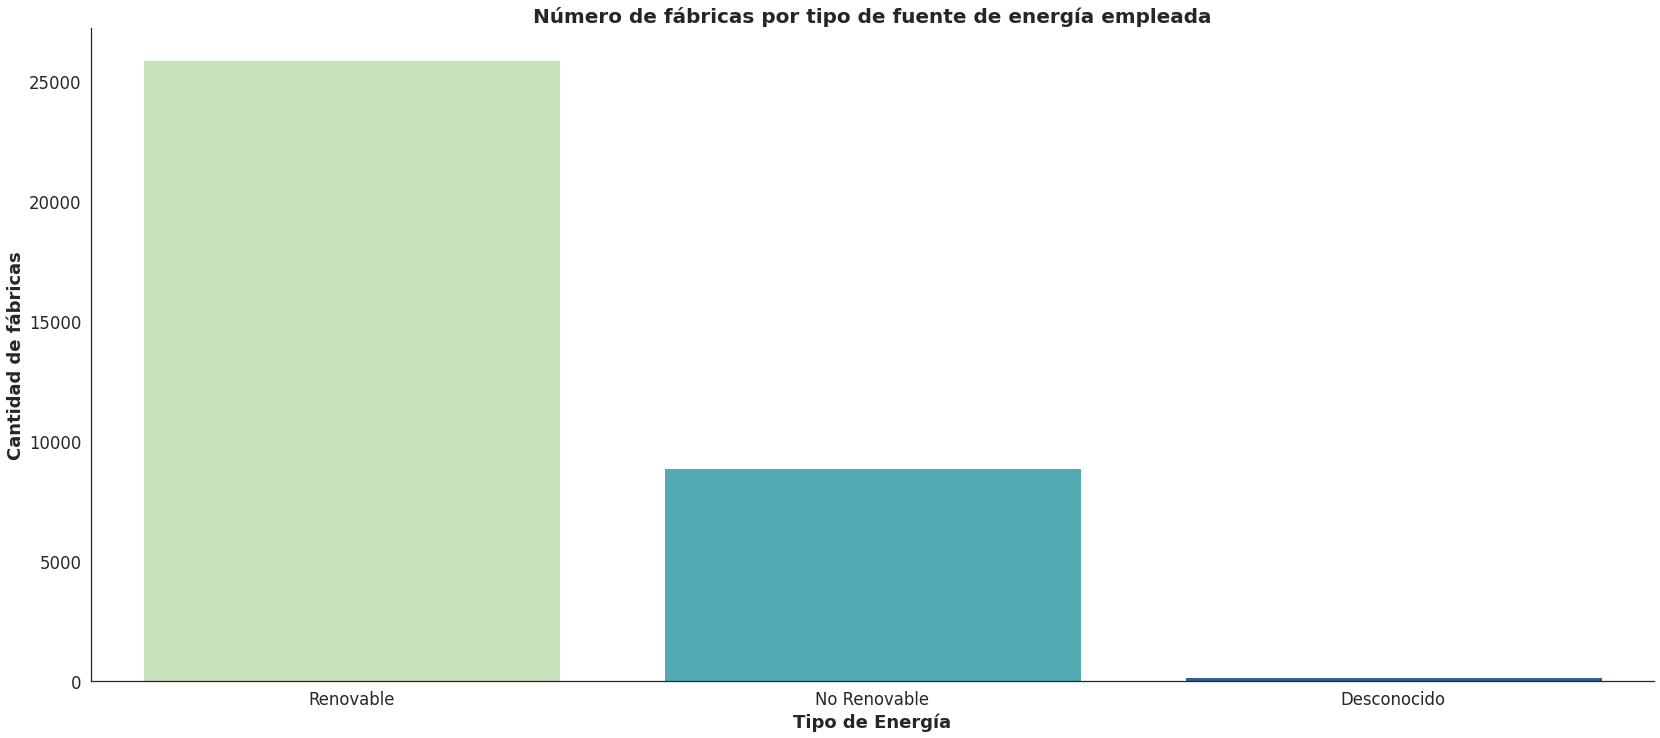

In [65]:
# Gráfico de barras del número de fábricas por el tipo de energía empleada.
grafica_barras(
    data=df_energia,
    x_axis='Tipo de Energía',
    y_axis='Cantidad de Fábricas',
    title='Número de fábricas por tipo de fuente de energía empleada',
    x_label='Tipo de Energía',
    y_label='Cantidad de fábricas'
)

Según los datos, pudimos notar que la mayoría de las fábricas de producción de energía operan mediante energías renovables.

In [66]:
df_energia2 = df_fabricas[['capacity_mw', 'TipoEnergía']]
df_energia2 = df_energia2.groupby('TipoEnergía').sum().reset_index()
df_energia2.columns = ['Tipo de Energía', 'Capacidad']
porcentajes = []
for i in df_energia2["Capacidad"]:
  porcentajes.append(i/df_energia2['Capacidad'].sum()*100)
df_energia2["Porcentaje"] = porcentajes
df_energia2 = df_energia2.sort_values(by = "Porcentaje", ascending = False)
df_energia2

,Tipo de Energía,Capacidad,Porcentaje
1,No Renovable,4.130807e+06,72.381714
2,Renovable,1.570844e+06,27.524976
0,Desconocido,5.325160e+03,0.093310


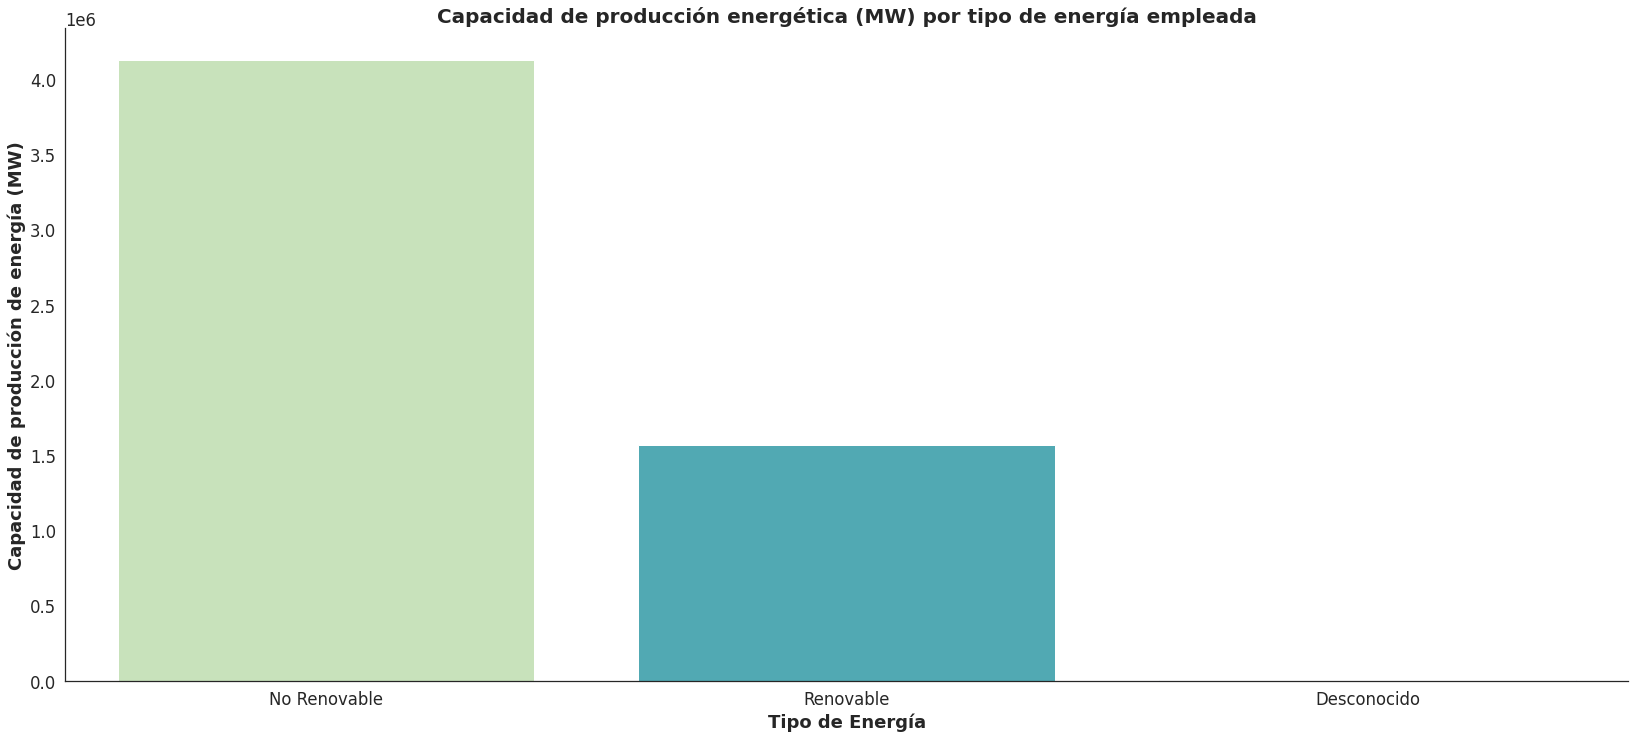

In [67]:
# Gráfico de barras de la capacidad de producción de energía según el tipo de energía empleada.
grafica_barras(
    data=df_energia2,
    x_axis='Tipo de Energía',
    y_axis='Capacidad',
    title='Capacidad de producción energética (MW) por tipo de energía empleada',
    x_label='Tipo de Energía',
    y_label='Capacidad de producción de energía (MW)'
)

Pese a que anteriormente habíamos visto que la mayoría de las fábricas operaban con combustibles o energías renovables, con estas dos últimas gráficas podemos notar que la capacidad de producción de energía es superior en aquellas fábricas que utilizan fuentes de energía no renovables.

In [68]:
df_energia3 = df_fabricas[["generation_gwh_2019", "TipoEnergía", 'primary_fuel']]
df_energia3.columns = ["Energía generada gwh 2019", "Tipo de Energía", "Fuente"]
df_energia4 = df_energia3[["Energía generada gwh 2019", "Tipo de Energía"]]
porcentajes = []
for i in df_energia3["Energía generada gwh 2019"]:
  porcentajes.append(i/df_energia3['Energía generada gwh 2019'].sum()*100)
df_energia4["Porcentaje"] = porcentajes
df_energia4 = df_energia4.sort_values(by = "Porcentaje", ascending = False).reset_index()
df_energia4 = df_energia4.drop('index', axis=1)
df_energia4 = df_energia4.fillna(0)

In [69]:
df_2019 = df_energia4.groupby('Tipo de Energía').sum().reset_index()
df_2019 = df_2019.sort_values(by="Porcentaje", ascending = False)

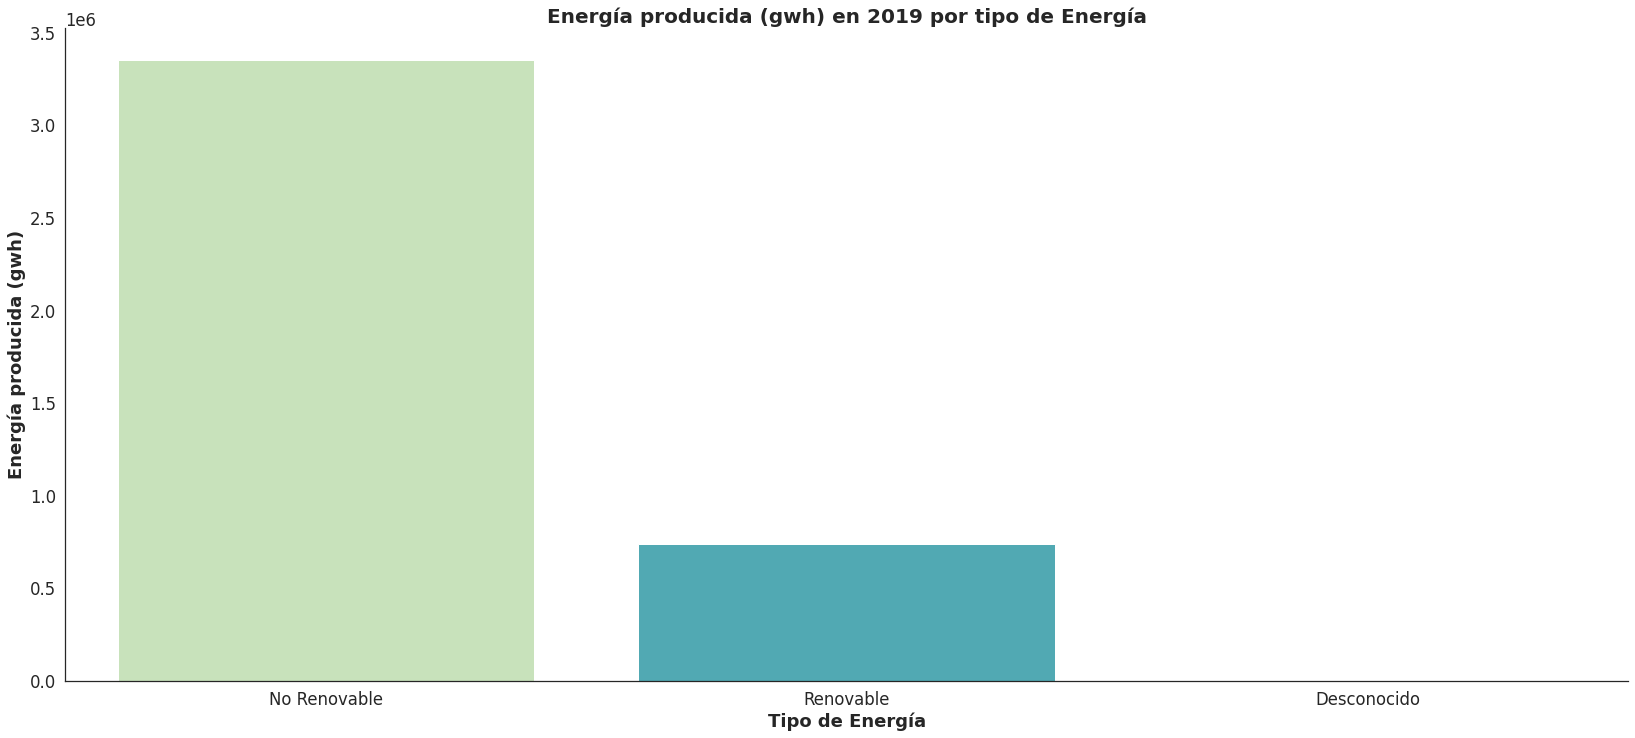

In [70]:
# Gráfico de barras de la energía producida (gwh) por el tipo de energía empleada.
grafica_barras(
    data=df_2019,
    x_axis='Tipo de Energía',
    y_axis='Energía generada gwh 2019',
    title='Energía producida (gwh) en 2019 por tipo de Energía',
    x_label='Tipo de Energía',
    y_label='Energía producida (gwh)'
)

Por su parte, más del 80% de la energía producida en el año 2019 (último año del conjunto de datos) proviene de fábricas que operan con combustibles o energías no renovables. 

In [71]:
# Ahora revisamos la capacidad de producción de energía por tipo de energía o 
# combustible empleado.

df_energia5 = df_fabricas[['capacity_mw', 'primary_fuel', 'TipoEnergía']]
df_energia5 = df_energia5.groupby(['primary_fuel', 'TipoEnergía']).sum().reset_index()
df_energia5.columns = ['Combustible', 'Tipo', 'Capacidad']
df_energia5 = df_energia5.sort_values(by=["Tipo","Capacidad"], ascending = [False, False])
df_energia5

,Combustible,Tipo,Capacidad
5,Hydro,Renovable,1.053160e+06
14,Wind,Renovable,2.630537e+05
10,Solar,Renovable,1.883123e+05
0,Biomass,Renovable,3.428130e+04
12,Waste,Renovable,1.474871e+04
4,Geothermal,Renovable,1.268775e+04
2,Cogeneration,Renovable,4.048000e+03
13,Wave and Tidal,Renovable,5.522000e+02
1,Coal,No Renovable,1.965541e+06
3,Gas,No Renovable,1.493051e+06


In [72]:
# Graficaremos tanto por tipo de energía energía empleada según su tipo:
df_Renovable = df_energia5.loc[df_energia5["Tipo"] == "Renovable"]
df_NoRenovable = df_energia5.loc[df_energia5["Tipo"] == "No Renovable"]

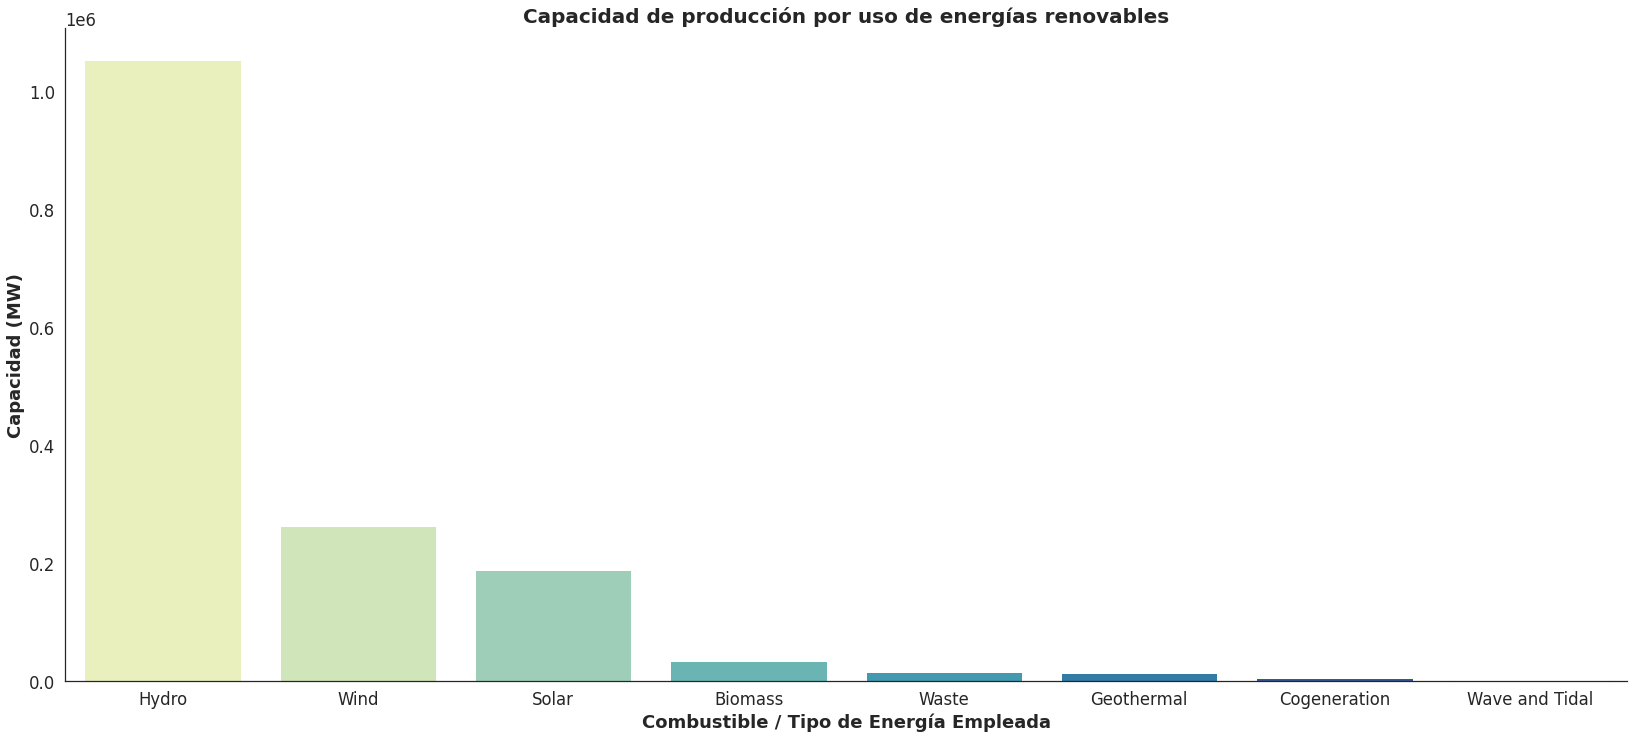

In [73]:
# Gráfico de barras de la capacidad de producción por cada tipo de energía o 
# combustible renovable empleado.
grafica_barras(
    data=df_Renovable,
    x_axis='Combustible',
    y_axis='Capacidad',
    title='Capacidad de producción por uso de energías renovables',
    x_label='Combustible / Tipo de Energía Empleada',
    y_label='Capacidad (MW)'
)

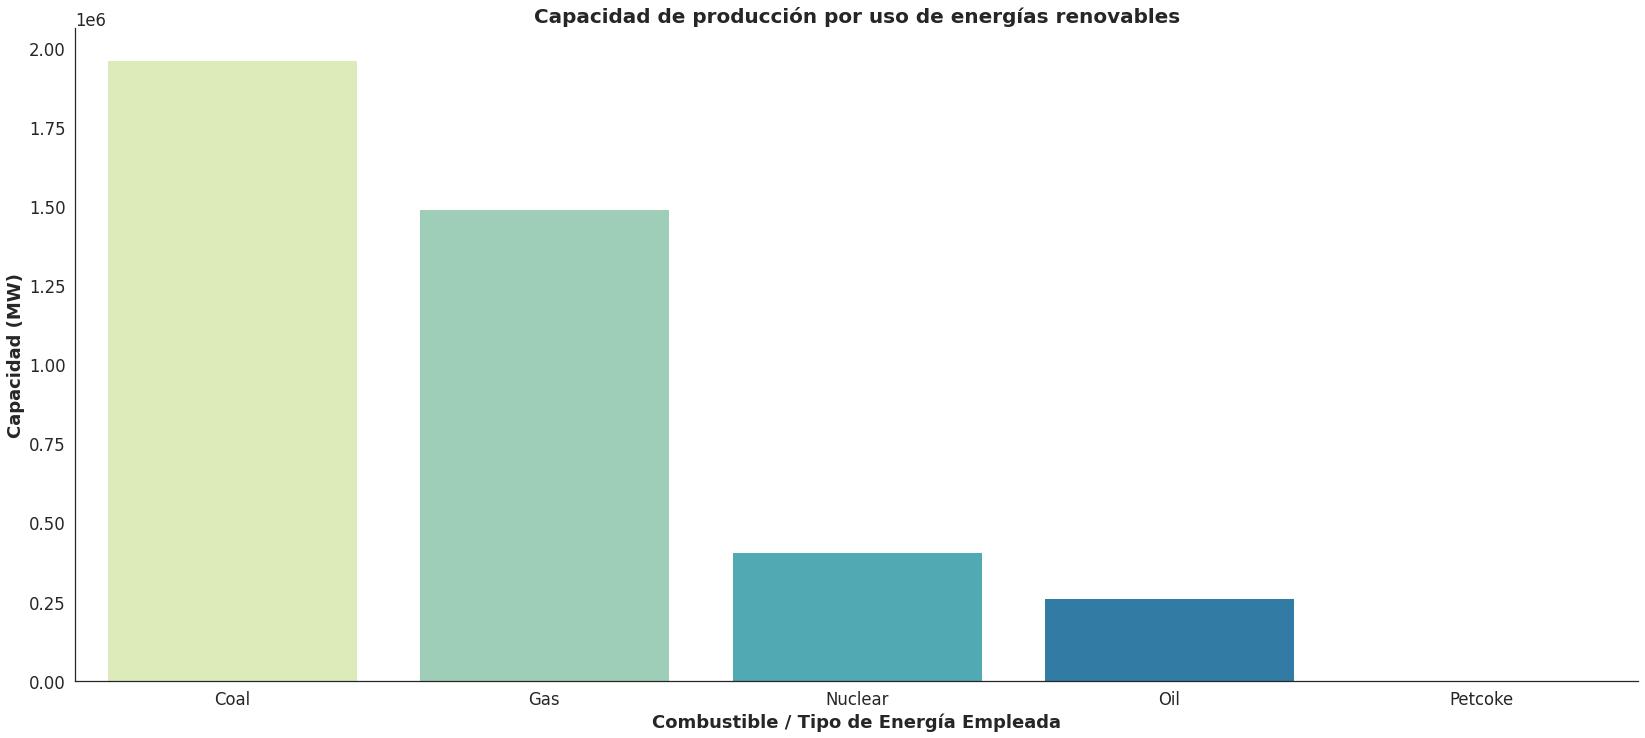

In [74]:
# Gráfico de barras de la capacidad de producción por cada tipo de energía o 
# combustible no renovable empleado.
grafica_barras(
    data=df_NoRenovable,
    x_axis='Combustible',
    y_axis='Capacidad',
    title='Capacidad de producción por uso de energías renovables',
    x_label='Combustible / Tipo de Energía Empleada',
    y_label='Capacidad (MW)'
)

Por otro lado, podemos notar que las fábricas que operan mediante carbón y gas, tienen una capacidad de producción energética mucha más alta que la capacidad energética registrada por aquellas fábricas que operan con energías renovables.

In [75]:
# Rellenamos los datos faltantes con cero dado que no tenemos una estimación para 
# la producción de las fábricas en el año 2019.
df_energia3["Energía generada gwh 2019"] = df_energia3['Energía generada gwh 2019'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
df_energia3 = df_energia3.groupby(["Fuente", "Tipo de Energía"]).sum().reset_index()
df_energia3 = df_energia3.sort_values(by = ["Tipo de Energía","Energía generada gwh 2019"], ascending = [False, False])

In [77]:
# Notemos que storage aparece como negativo pero esto no es un error pues las plantas
# almacenamiento no producen energía, sino que la consumen. Por su parte, los registros
# de Wave and Tidal (energía de olas y mareas) son escasos y no muy grandes, de ahí
# que tome un valor tan pequeño.
df_energia3

,Fuente,Tipo de Energía,Energía generada gwh 2019
14,Wind,Renovable,2.953547e+05
5,Hydro,Renovable,2.821979e+05
10,Solar,Renovable,7.165244e+04
12,Waste,Renovable,4.428849e+04
0,Biomass,Renovable,2.570438e+04
4,Geothermal,Renovable,1.554570e+04
2,Cogeneration,Renovable,3.888141e+03
13,Wave and Tidal,Renovable,0.000000e+00
3,Gas,No Renovable,1.580190e+06
1,Coal,No Renovable,9.377899e+05


In [78]:
df_Prod_Renovable = df_energia3.loc[df_energia3["Tipo de Energía"] == "Renovable"]
df_Prod_NoRenovable = df_energia3.loc[df_energia3["Tipo de Energía"] == "No Renovable"]

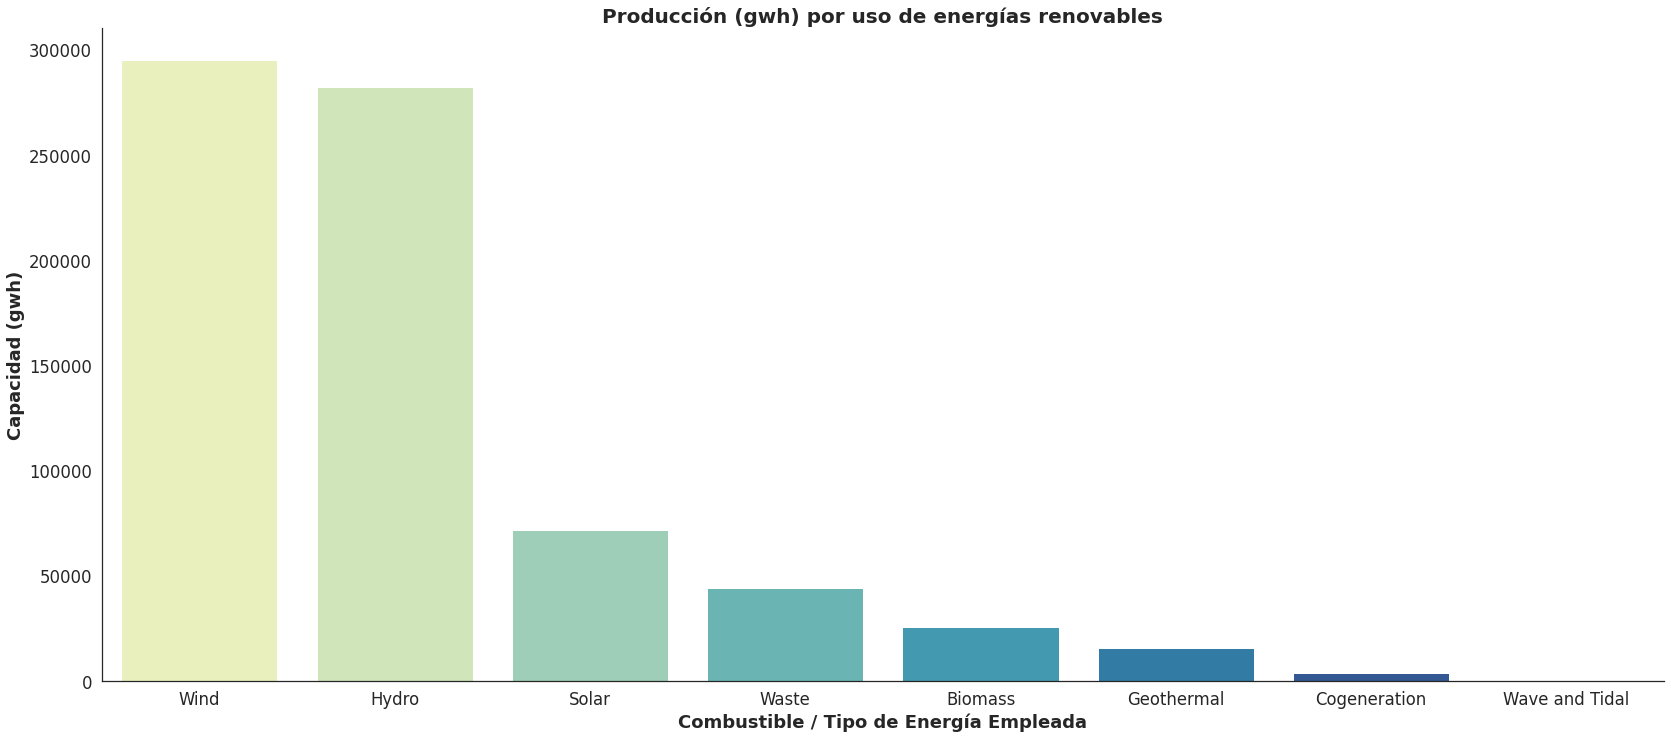

In [79]:
# Gráfico de barras de la producción de energía por uso de algún combustible
# o energía renovable
grafica_barras(
    data=df_Prod_Renovable,
    x_axis='Fuente',
    y_axis='Energía generada gwh 2019',
    title='Producción (gwh) por uso de energías renovables',
    x_label='Combustible / Tipo de Energía Empleada',
    y_label='Capacidad (gwh)'
)

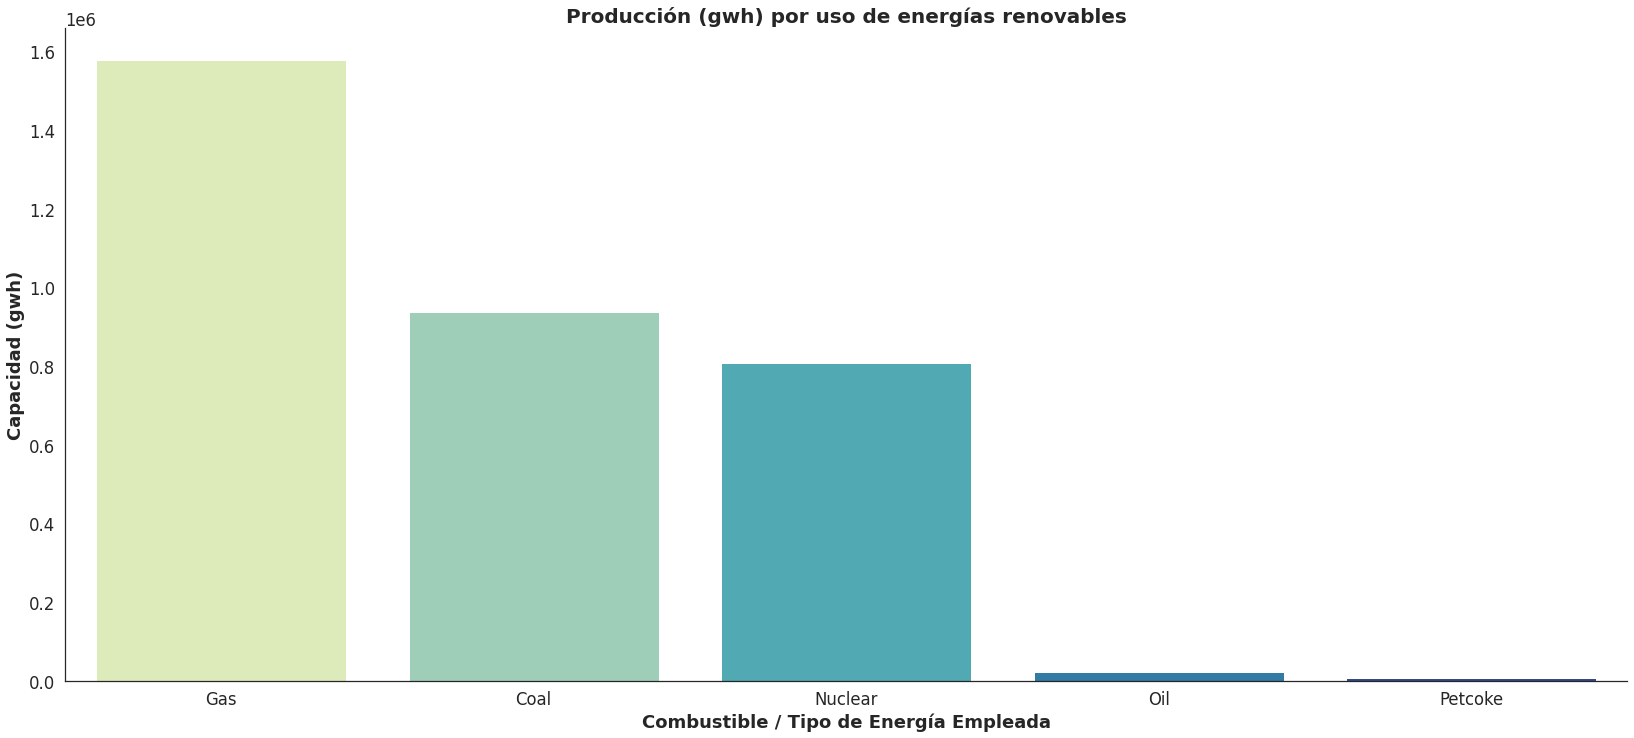

In [80]:
# Gráfico de barras de la producción de energía por uso de algún combustible
# o energía no renovable
grafica_barras(
    data=df_Prod_NoRenovable,
    x_axis='Fuente',
    y_axis='Energía generada gwh 2019',
    title='Producción (gwh) por uso de energías renovables',
    x_label='Combustible / Tipo de Energía Empleada',
    y_label='Capacidad (gwh)'
)

Por último, vemos que las fábricas que operan mediante gas, carbón y energía nuclear, produjeron más energía en 2019 que aquellas fábricas que operan mediante energía eólica, energía marítima o energía solar.

Como conclusión a esta pregunta, tenemos lo siguiente:
Si bien, la mayor cantidad de fábricas operan mediante energías o combustibles renovables, su producción y capacidad de generación de energía es considerablemente menor a las que generan las fábricas que emplean enregías o combustibles no renovables. Lo cual nos muestra que, por lo menos hasta 2019, el mundo sigue produciendo energía con fuentes no renovables, que son altamente contaminantes y que contribuyen al agravamiento del fenómeno llamado calentamiento global.

#### Pregunta 4. ¿Cuáles países emiten la mayor cantidad de CO<sub>2</sub> entre 2002 y 2018?

In [81]:
# Se realiza la suma de las emisiones de C02 por país
c02_por_pais = df_energiaP9.groupby('country')['co2_emission'].sum()

# Se obtienen los 10 países con más emisiones
c02_top_10_paises = c02_por_pais.sort_values(ascending = False).head(10).reset_index()

In [82]:
c02_top_10_paises

,country,co2_emission
0,China,269684.533565
1,United States,190553.372438
2,Russia,55765.431412
3,India,51835.871748
4,Japan,42139.840491
5,Germany,28127.236495
6,South Korea,19645.898407
7,Canada,19386.467392
8,United Kingdom,17943.248558
9,Iran,16943.984076


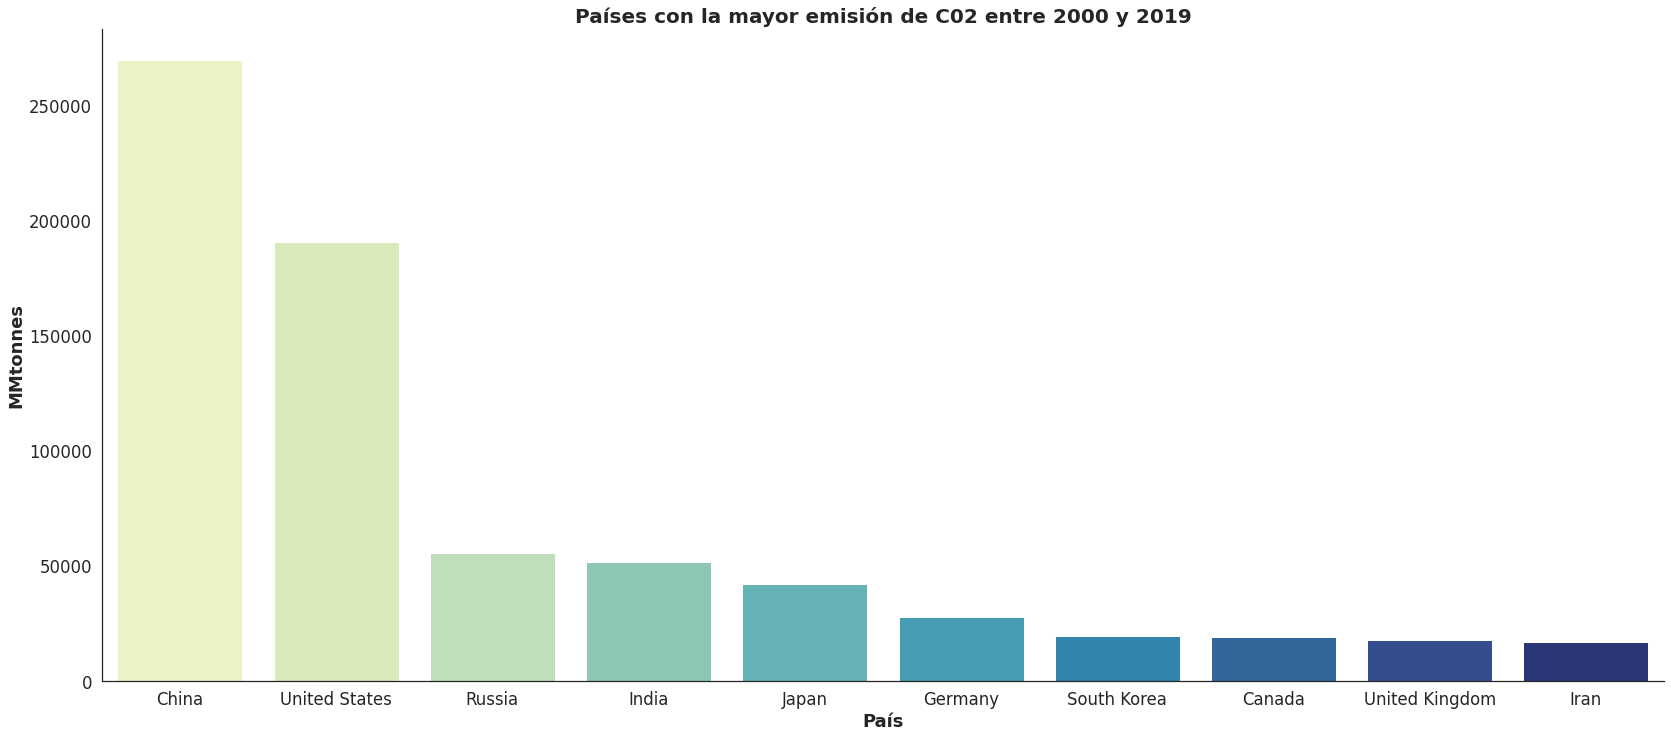

In [83]:
grafica_barras(
    data=c02_top_10_paises,
    x_axis='country',
    y_axis='co2_emission',
    title= 'Países con la mayor emisión de C02 entre 2000 y 2019',
    x_label='País',
    y_label='MMtonnes',
    )

#### Pregunta 5. ¿Cuál es la relación con el tamaño de su población?

In [88]:
# se realiza una copia del DataFrame para no alterar el original
df_energia_copia = df_energiaP9.copy()

In [89]:
# Se obtiene la media de la población por país
poblacion_por_pais = df_energia_copia.groupby('country')['population'].mean()

# Se obtienen los 10 países más poblados
poblacion_top_10_paises = poblacion_por_pais.sort_values(ascending = False).head(10).reset_index()

In [90]:
poblacion_top_10_paises

,country,population
0,China,1.369563e+06
1,India,1.231531e+06
2,United States,3.086569e+05
3,Indonesia,2.426085e+05
4,Brazil,1.955239e+05
5,Pakistan,1.799075e+05
6,Nigeria,1.599292e+05
7,Bangladesh,1.475003e+05
8,Russia,1.442796e+05
9,Japan,1.281555e+05


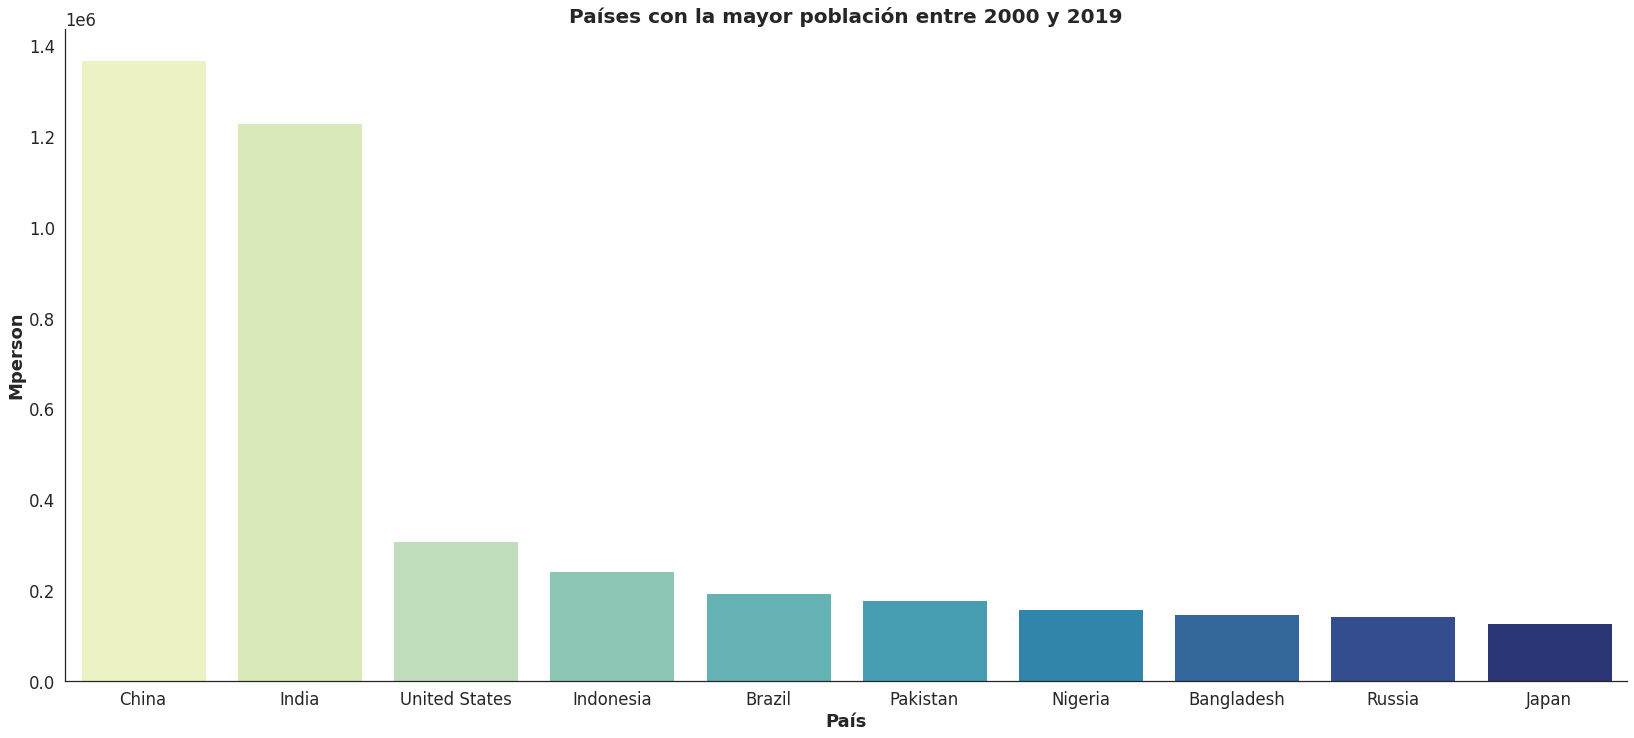

In [91]:
grafica_barras(
    data=poblacion_top_10_paises,
    x_axis='country',
    y_axis='population',
    title= 'Países con la mayor población entre 2000 y 2019',
    x_label='País',
    y_label='Mperson',
    )

In [92]:
# Se muestran los datos de emisiones de c02 y población para su contraste
pd.concat([c02_top_10_paises, poblacion_top_10_paises], keys=['c02', 'population'], axis=1)

c02                    population              
          country   co2_emission        country    population
0           China  269684.533565          China  1.369563e+06
1   United States  190553.372438          India  1.231531e+06
2          Russia   55765.431412  United States  3.086569e+05
3           India   51835.871748      Indonesia  2.426085e+05
4           Japan   42139.840491         Brazil  1.955239e+05
5         Germany   28127.236495       Pakistan  1.799075e+05
6     South Korea   19645.898407        Nigeria  1.599292e+05
7          Canada   19386.467392     Bangladesh  1.475003e+05
8  United Kingdom   17943.248558         Russia  1.442796e+05
9            Iran   16943.984076          Japan  1.281555e+05

En los resultados anteriores, se puede observar que **existe una relación proporcional entre la cantidad de emisiónes de C02 de un país con respecto a su población**, por ejemplo, China resultó estar en la primera posición tanto en emisiones de C02 como el país más poblado.

Este resultado era el esperado, ya que entre mayor sea la cantidad de personas en un país, mayor será la demanda energetica y de combustibles para las actividades del día a día.

#### Pregunta 6. ¿Cuál país emite la mayor cantidad de CO<sub>2</sub> per capita?

In [93]:
# Country
#  CO2_emission - The amount of C02 emitted, measured (MMtonnes CO2)
#  Population - Population of specific Country, measured (Mperson)
#  CO2_emission / Population
#  where: Energy_type = "all_energy_types"
#lectura del dataset 2
df_energia2= df_energiaP9.copy() #copia del dataset general 
df_energia2.rename(columns={'energy_type' : 'e_type', 'co2_emission' : 'co2', 'population' : 'c_pop'
                   }, inplace=True)
  # al filtrar por "all_energy_types" se obtienenen los totales CO2_emission & Population de cada pais 
temp_co2 = df_energia2[df_energia2['e_type']=="all_energy_types"]
  # se quitan columnas extras
temp_co2 = temp_co2.drop(columns=['e_type', 'energy_consumption','gdp','energy_intensity_per_capita','energy_production','energy_intensity_by_gdp'])
# calculo de emision de Co2 per capita / per pais/ per year
temp_co2["co2_capita"] = temp_co2["co2"] / temp_co2["c_pop"] * 1000
# agrupamos por pais y sacamos la media de todos los anios 
ds_co2 = temp_co2.groupby('country')['co2_capita'].agg([pd.Series.mean])
ds_co2.rename(columns={'mean' : 'co2_per_capita'}, inplace=True)
ds_co2 = ds_co2.dropna(axis=0, subset=['co2_per_capita'], how = 'any')
#ordenamos y seleccionamos el top10
ds_co2= ds_co2.sort_values("co2_per_capita", axis = 0, ascending = False).head(10)
ds_co2

,co2_per_capita
country,
Qatar,40.622083
Singapore,34.360258
United Arab Emirates,29.643169
Bahrain,27.018657
Kuwait,26.624337
Luxembourg,22.173132
Brunei,20.201635
United States,18.223859
Australia,17.701046


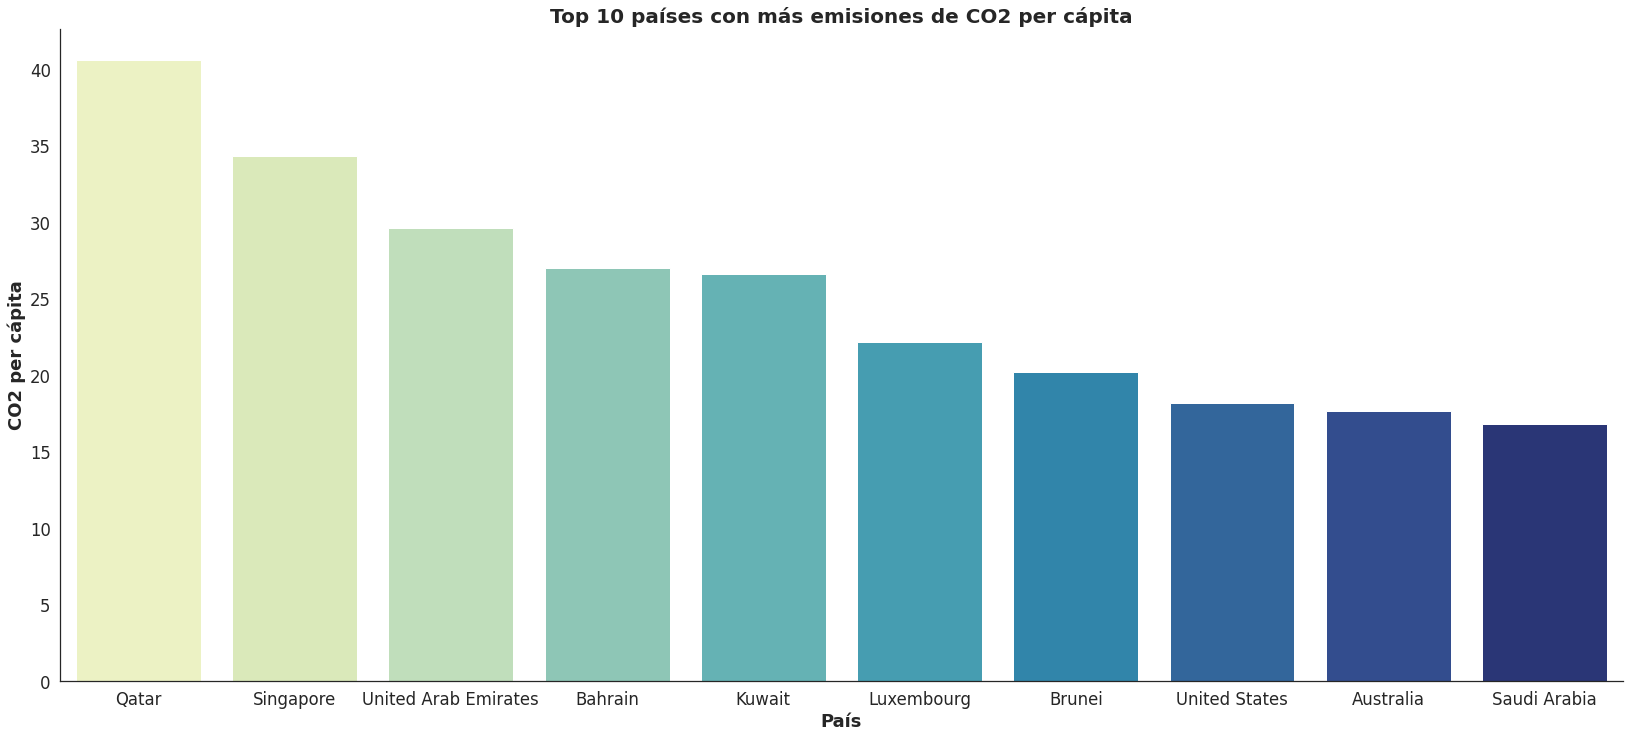

In [94]:
grafica_barras(
    data=ds_co2,
    x_axis= ds_co2.index,
    y_axis='co2_per_capita',
    title='Top 10 países con más emisiones de CO2 per cápita',
    x_label='País',
    y_label='CO2 per cápita'
)

En la tabla anterior, mostramos los 10 países con más emisiones de CO2 a lo largo del tiempo.

In [95]:
#obtener el país que emite la mayor cantidad de CO2 per capita?
ds_co2.loc[ds_co2['co2_per_capita'].idxmax()]

co2_per_capita    40.622083
Name: Qatar, dtype: float64

#### Pregunta 7. ¿Los países con mayor consumo de energía renovable han disminuido o desacelerado su producción de CO<sub>2</sub> en los últimos años?

In [96]:
#¿Los países con mayor consumo de energía renovable han disminuido o desacelerado su producción de CO2 en los últimos años?
# Country
#  CO2_emission - The amount of C02 emitted, measured (MMtonnes CO2)
#  Population - Population of specific Country, measured (Mperson)
#  CO2_emission / Population
#  where: Energy_type = "all_energy_types"
sns.set(rc={'figure.figsize':(10, 5)})
df_energia3= df_energiaP9.copy() #copia del DF General
df_energia3.rename(columns={'energy_type' : 'e_type', 'co2_emission' : 'co2', 'energy_consumption' : 'e_con', 'population' : 'c_pop'
                   }, inplace=True)

  # al filtrar por "all_energy_types" se obtienenen los totales CO2_emission & Population de cada pais 
temp_co2 = df_energia3[df_energia3['e_type']=="renewables_n_other"]
  # se quitan columnas extras
temp_co2 = temp_co2.drop(columns=['e_type', 'c_pop','gdp','energy_intensity_per_capita','energy_production','energy_intensity_by_gdp'])

# agrupamos por pais y sacamos la media de todos los anios 
ds_econ = temp_co2.groupby('country')['e_con'].agg([pd.Series.mean])
ds_econ.rename(columns={'mean' : 'e_con_avg'}, inplace=True)
ds_econ = ds_econ.dropna(axis=0, subset=['e_con_avg'], how = 'any')
#ordenamos y seleccionamos el top10
ds_econ= ds_econ.sort_values("e_con_avg", axis = 0, ascending = False).head(10)

ds_econ

,e_con_avg
country,
United States,8.238451
China,8.061946
Brazil,4.084178
Canada,3.657220
India,1.623712
Russia,1.564867
Japan,1.466563
Germany,1.259242
Norway,1.246504


In [97]:
def plot_co2_econ(dfl, country):
    #obtener registros de emision de CO2 - USA
    ds_co2_1= dfl.loc[ (dfl['country']==country) & (dfl['e_type']=="all_energy_types") ]
    #ds_co2_1 = ds_co2_1.drop(columns=opciones)
    ds_co2_1 = ds_co2_1.drop(columns=['country','e_type', 'e_con', 'c_pop','gdp','energy_intensity_per_capita','energy_production','energy_intensity_by_gdp'])
    ds_co2_1.set_index("year", inplace = True)
    # Ajuste para escalar la grafica vs consumo e-renovable
    ds_co2_1["co2"] = ds_co2_1["co2"] / 100
    #print(ds_co2_1.head())
    #obtener registros de produccion de E-Limpias - USA
    ds_e_con_1= dfl.loc[ (dfl['country']==country) & (dfl['e_type']=="all_energy_types") ]
    #ds_e_con_1 = ds_e_con_1.drop(columns=opciones)
    ds_e_con_1 = ds_e_con_1.drop(columns=['country','e_type', 'co2', 'c_pop','gdp','energy_intensity_per_capita','energy_production','energy_intensity_by_gdp'])
    ds_e_con_1.set_index("year", inplace = True)
    #print(ds_e_con_1.head())
    #plot multiple lines with legend
    plt.plot(ds_e_con_1.index, ds_e_con_1['e_con'], 'g', label='Consumo E-Limpias')
    plt.plot(ds_e_con_1.index, ds_co2_1['co2'], 'r', label='Emision CO2')
    plt.title('Comparacion '+country+': Emision CO2 vs Consumo E-Limpias en el tiempo')
    plt.legend()
    plt.show()

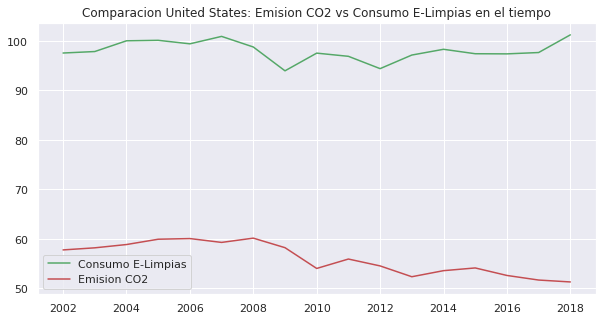

In [98]:
plot_co2_econ(df_energia3, 'United States')

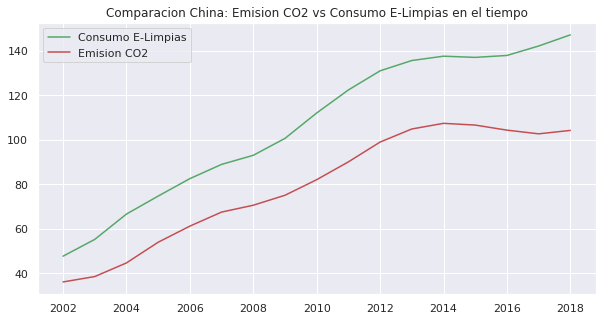

In [99]:
plot_co2_econ(df_energia3, 'China')

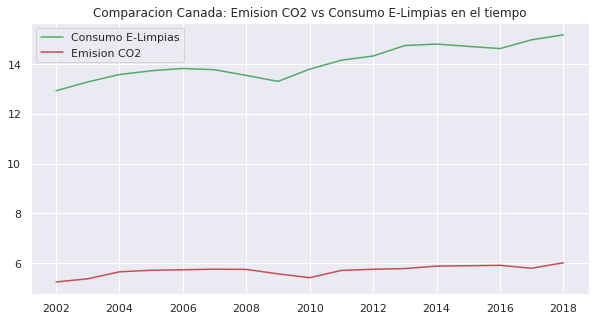

In [100]:
plot_co2_econ(df_energia3, 'Canada')

Analizando las gráficas de los tres países que más producen CO2, se observa que a partir del 2010 ha habido una ligera disminución de Emisión CO2 en proporción al aumento de Consumo de Energias-Limpias.

#### Pregunta 8. ¿Qué tanta incertidumbre hay en la medida estadística usada para responder las preguntas anteriores?

En las preguntas anteriores se utilizó la media de los datos como la medida estadística para responderlas. A continiuación se analizará qué tanta incertidumbre existe en esta medida estadística.

Se realizó un proceso de Bootstrap para diferentes datos, como la energía producida, la energía consumida y la emisión de CO<sub>2</sub>  por año, considerando únicamente los alos 2002, 2006, 2010, 2014 y 2018.

Se consideró un muestreo con un `n`igual a la mitad del total de los datos



In [101]:
def do_bootstrap(df, anio, column):
  df_filtered = df[df['year'] == anio]
  data_column = df_filtered[column]

  n = 2000
  means = []

  for i in range(10_000):
    samples = data_column.sample(n=n, replace = True)
    means.append(samples.mean())

  return pd.Series(means)

def do_multi_bootstrap(df, column, title):
  years = { 0: 2002, 1: 2006, 2: 2010, 3: 2014, 4: 2018 }
  series = []

  for v in years.values():
    series.append(do_bootstrap(df, v, column))

  s_df = pd.concat(series, axis=1)
  s_df.rename(columns = years, inplace=True)
  gf = sns.displot(s_df,  kind="kde", bw_adjust=.25)
  gf.set(title=title)

  return s_df
  
def obtener_bootstrap_estadisticos(df):
  err_std = df.std()
  range = df.max() - df.min()

  print(f'Error estándar:\n{err_std}')
  print(f'\nRango:\n{range}')
  print(f'\nError estandar/Rango:\n{err_std / range}')

  lim_inferior = df.quantile(0.025)
  lim_superior = df.quantile(0.975)
  means = df.mean()

  means_intervals = ((means - lim_inferior) + (lim_superior - means)) / 2

  print(f'\nIntervalo de 95% confianza de la media:\n')

  years = [2002, 2006, 2010, 2014, 2018]

  for y in years:
    print(f'{means[y]} +/- {means_intervals[y]}')

  print(f'\nBoxplot:\n')
  sns.boxplot(data=df, orient="h");

In [102]:
df_energiaP9.head()

,country,energy_type,year,energy_consumption,energy_production,gdp,population,energy_intensity_per_capita,energy_intensity_by_gdp,co2_emission
0,Afghanistan,all_energy_types,2002,0.015110,0.007910,28.8519,22600.8,0.668539,0.523692,0.848627
1,Afghanistan,coal,2002,0.000438,0.000416,28.8519,22600.8,0.668539,0.523692,0.050539
2,Afghanistan,natural_gas,2002,0.001849,0.001849,28.8519,22600.8,0.668539,0.523692,0.098088
3,Afghanistan,petroleum_n_other_liquids,2002,0.006836,0.000000,28.8519,22600.8,0.668539,0.523692,0.700000
4,Afghanistan,renewables_n_other,2002,0.005987,0.005646,28.8519,22600.8,0.668539,0.523692,0.000000


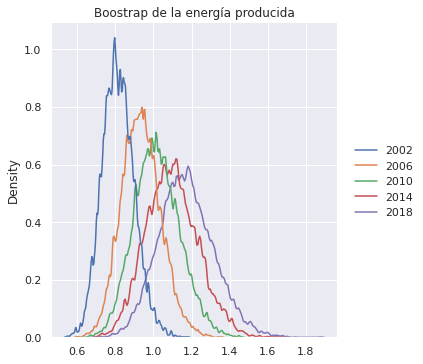

In [103]:
boot_e_prod = do_multi_bootstrap(df_energiaP9, 'energy_production', 'Boostrap de la energía producida')

Error estándar:
2002    0.084481
2006    0.102735
2010    0.119669
2014    0.135772
2018    0.144508
dtype: float64

Rango:
2002    0.640624
2006    0.760713
2010    0.856781
2014    0.966386
2018    1.189663
dtype: float64

Error estandar/Rango:
2002    0.131873
2006    0.135051
2010    0.139673
2014    0.140495
2018    0.121470
dtype: float64

Intervalo de 95% confianza de la media:

0.8151462148433235 +/- 0.16551099215366588
0.9354013189032907 +/- 0.2011401290699325
1.0183039606214561 +/- 0.23470939292564486
1.0967551404619076 +/- 0.26595114765322636
1.1713274179371902 +/- 0.2829877700507122

Boxplot:



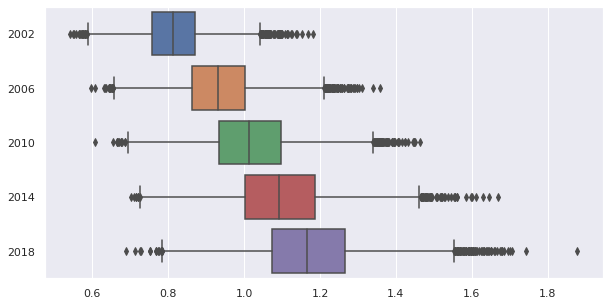

In [104]:
obtener_bootstrap_estadisticos(boot_e_prod)

Se puede observar que la distibución de las medias muestrales de los datos de energía producida están sesgadas hacia la derecha, sin embargo, con el sesgo va disminuyendo en cada año que fueron recabados los datos, siendo mayor para el año 2002 y menor para el año 2018. Así mismo, el error estándar con relación al rango, va disminuyendo cada año.

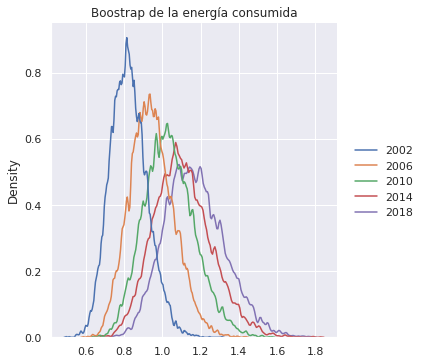

In [105]:
boot_e_con = do_multi_bootstrap(df_energiaP9, 'energy_consumption', 'Boostrap de la energía consumida')

Error estandar:
2002    0.095850
2006    0.115411
2010    0.129958
2014    0.148552
2018    0.152966
dtype: float64

Rango:
2002    0.747676
2006    0.898204
2010    0.910242
2014    1.059442
2018    1.074159
dtype: float64

Error estandar/Rango:
2002    0.128197
2006    0.128491
2010    0.142773
2014    0.140217
2018    0.142405
dtype: float64

Intervalo de 95% confianza de la media:

0.8277930170405523 +/- 0.1883293320020602
0.9453660584793006 +/- 0.226017593440631
1.035816438537398 +/- 0.25551573797477367
1.1050023024002082 +/- 0.2898535536797997
1.169256778024491 +/- 0.3007039072112221

Boxplot:



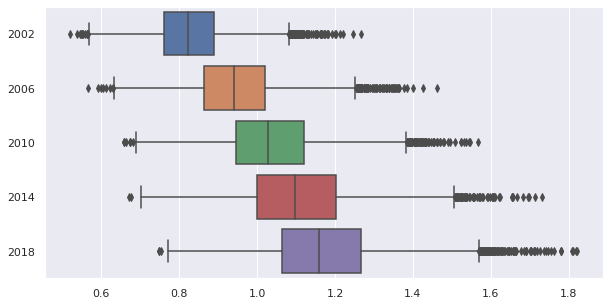

In [ ]:
obtener_bootstrap_estadisticos(boot_e_con)

Se observa que la distribución de las medias muestrales de la energía consumida tiene un comportamiento similar al de la energía producida.

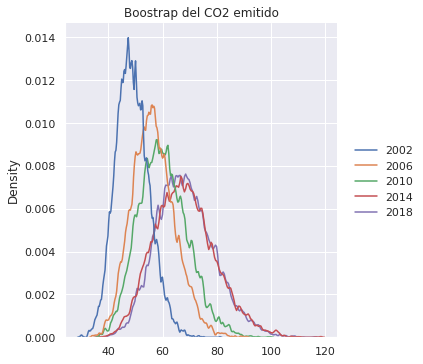

In [ ]:
boot_co2 = do_multi_bootstrap(df_energiaP9, 'co2_emission', 'Boostrap del CO2 emitido')

Error estandar:
2002     6.186469
2006     7.904349
2010     9.014729
2014    11.238528
2018    10.700481
dtype: float64

Rango:
2002    51.852400
2006    57.333241
2010    63.588448
2014    82.430889
2018    78.466637
dtype: float64

Error estandar/Rango:
2002    0.119309
2006    0.137867
2010    0.141767
2014    0.136339
2018    0.136370
dtype: float64

Intervalo de 95% confianza de la media:

48.86595080091753 +/- 12.080003266489264
56.61529974248128 +/- 15.256442579098927
60.14315115198701 +/- 17.5879224724764
68.09988164236053 +/- 21.936317623626376
68.37947600536585 +/- 20.98390568125709

Boxplot:



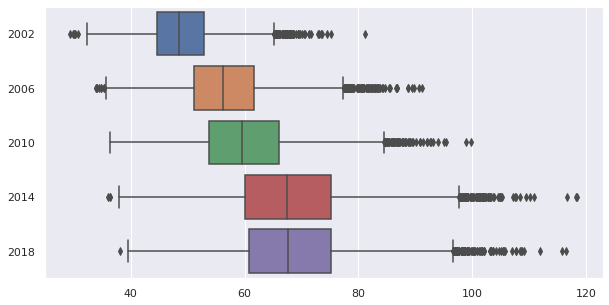

In [ ]:
obtener_bootstrap_estadisticos(boot_co2)

Al igual que los dos análisis anteriores, la distribución de las medias muestrales de la emisión de Co<sub>2</sub> tiene un sesgo hacia la derecha que va disminuyendo con el pasar de los años, a partir del año 2014 pareciese que el error estándar no presenta grandes variaciones.

Por último, todas estos cambios pueden ser consecuencia de los métodos usados para recopilar los datos cada año.

#### Pregunta 9. ¿Ha cambiado el tipo de energía que usa cada país entre 2002-2018? 


In [ ]:
#Podemos generar una tabla de consumo y producción de energia y emisiones de CO2 agrupada por año y tipo de energia
df_por_anio_y_tipo = df_energiaP9[['year','energy_type','energy_consumption','energy_production','co2_emission']].groupby(['year','energy_type']).sum()
df_por_anio_y_tipo

energy_consumption  energy_production  \
year energy_type                                                        
2002 all_energy_types                   411.764380         405.615478   
     coal                               101.664527         101.011026   
     natural_gas                         93.533418          92.354813   
     nuclear                             26.671802          26.671802   
     petroleum_n_other_liquids          158.438918         153.597846   
...                                            ...                ...   
2018 coal                               165.853339         168.307734   
     natural_gas                        143.241396         143.142996   
     nuclear                             26.513244          26.513244   
     petroleum_n_other_liquids          196.254707         192.873434   
     renewables_n_other                  65.650971          68.219519   

                                co2_emission  
year energy_type                              
2002 all_energy_types           24337.983621  
     coal                        9416.932053  
     natural_gas                 4731.792580  
     nuclear                        0.000000  
     petroleum_n_other_liquids  10189.258988  
...                                      ...  
2018 coal                       15605.567051  
     natural_gas                 7219.802032  
     nuclear                        0.000000  
     petroleum_n_other_liquids  12090.756308  
     renewables_n_other             0.000000  

[102 rows x 3 columns]

In [ ]:
#Filtro para descartar paises que tienen producción de energía nulo en algun anio
df_produccion_mayor_0 = df_energiaP9[df_energiaP9['energy_production'] > 0]
#Filtro para descartar paises que tienen consumo de energía nulo en algun anio
df_consumo_mayor_0 = df_energiaP9[df_energiaP9['energy_consumption'] > 0]

In [ ]:
#Generamos una tabla de contingencia para producción
df_produccion_anio_tipo = pd.crosstab(df_produccion_mayor_0['year'],df_produccion_mayor_0['energy_type'])
df_produccion_anio_tipo

energy_type,all_energy_types,coal,natural_gas,nuclear,petroleum_n_other_liquids,renewables_n_other
year,,,,,,
2002,164,67,85,31,92,151
2003,166,68,85,31,93,153
2004,166,68,86,31,93,152
2005,170,66,89,31,93,156
2006,174,68,92,31,96,160
2007,175,67,91,31,96,161
2008,176,68,91,31,96,163
2009,179,67,92,31,96,167
2010,184,67,92,30,96,175


In [ ]:
#Consumo de energia
df_consumo_anio_tipo = pd.crosstab(df_consumo_mayor_0['year'],df_consumo_mayor_0['energy_type'])
df_consumo_anio_tipo

energy_type,all_energy_types,coal,natural_gas,nuclear,petroleum_n_other_liquids,renewables_n_other
year,,,,,,
2002,192,120,102,31,192,153
2003,193,120,103,31,193,154
2004,193,121,105,31,193,153
2005,193,122,106,31,193,158
2006,195,124,108,31,195,163
2007,195,126,108,31,195,163
2008,196,126,108,31,196,163
2009,196,126,110,31,196,167
2010,196,126,112,30,196,175


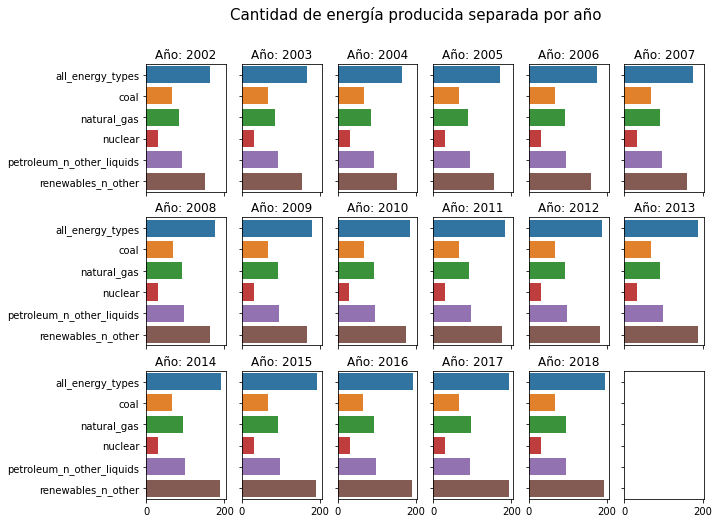

In [ ]:
#Podemos observar los resultados en una serie de graficas de columna
#Para la produccion de energia
lista_anios = df_produccion_anio_tipo.index
fig, axes = plt.subplots(3, 6, figsize=(10, 8), sharex=True, sharey=True)

for anio, ax in zip(lista_anios, axes.ravel()):
    # filter df for ticker and plot on specified axes
    sns.barplot(x=df_produccion_anio_tipo.loc[anio],y=df_produccion_anio_tipo.columns, ax=ax, orient='h')
    ax.set(xlabel='', ylabel='', title='Año: '+str(anio))

fig.suptitle('Países que procen energía separada por año', fontsize=15);

Se observa que la producción de energía no ha cambiado de forma importante. Parece que hay un aumento en la producción por recursos renovables, lo cuál puede verificarse en la tabla de contingencia. De la tabla también podemos rescatar que a aumentado el número de países que producen energía, lo que podemos ver reflejado en el tipo *all_energy_types*.

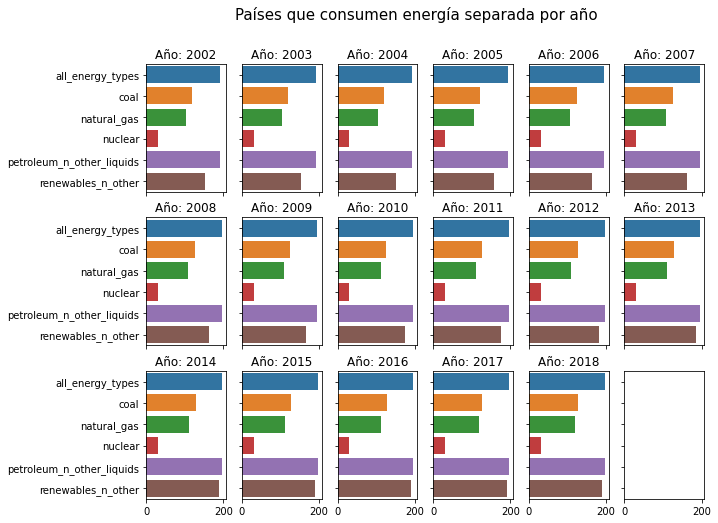

In [ ]:
#Para el consumo de energia
lista_anios = df_consumo_anio_tipo.index
fig, axes = plt.subplots(3, 6, figsize=(10, 8), sharex=True, sharey=True)

for anio, ax in zip(lista_anios, axes.ravel()):
    # filter df for ticker and plot on specified axes
    sns.barplot(x=df_consumo_anio_tipo.loc[anio],y=df_consumo_anio_tipo.columns, ax=ax, orient='h')
    ax.set(xlabel='', ylabel='', title='Año: '+str(anio))

fig.suptitle('Países que consumen energía separada por año', fontsize=15);

En el consumo de energía se observan de forma más clara algunos cambios. La cantidad de países que consumen energía de fuentes renovables a aumentado hasta casi ser igual al número de países que usan petroleo.

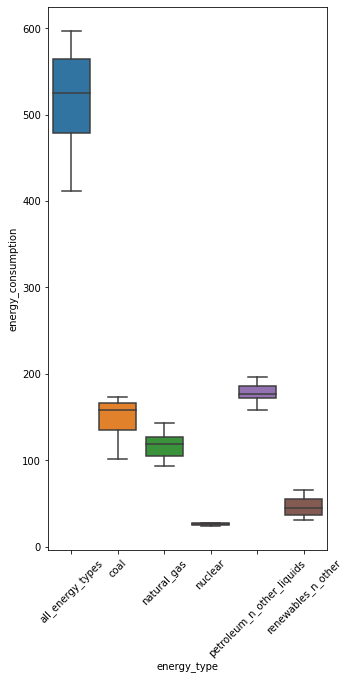

In [ ]:
#Generamos boxplots para el consumo de energía, separados por tipo de energía, para los años 2002-2018
plt.figure(figsize=(5, 10))
df_por_anio_y_tipo_columnas = df_por_anio_y_tipo.reset_index()
plt.xticks(rotation=45)
sns.boxplot(data=df_por_anio_y_tipo_columnas, x='energy_type', y='energy_consumption');

Para el consumo de energía a lo largo de estos años, algo que podemos destacar es el consumo de petroleo y el consumo practicamente constante de energía nuclear, dado que no ha aumentado ni disminuido practicamente el número de países que la consumen y la producen.  

#### Pregunta 10. ¿Cuánta energía ha producido y consumido México entre 2002 y 2018? ¿Cuánto CO2 ha emitido en ese mismo tiempo?

In [106]:
#Agrupamos por país y tipo
df_por_pais_y_tipo = df_energiaP9[['country','energy_type','energy_consumption','energy_production','co2_emission']].groupby(['country','energy_type']).sum()
df_por_pais_y_tipo

energy_consumption  energy_production  \
country     energy_type                                                        
Afghanistan all_energy_types                     1.462942           0.489463   
            coal                                 0.317852           0.301959   
            natural_gas                          0.060972           0.060972   
            petroleum_n_other_liquids            0.837225           0.000000   
            renewables_n_other                   0.246893           0.126532   
...                                                   ...                ...   
Zimbabwe    all_energy_types                     2.891810           2.202958   
            coal                                 1.317510           1.364639   
            natural_gas                          0.000000           0.000000   
            petroleum_n_other_liquids            0.693519           0.000000   
            renewables_n_other                   0.880781           0.838319   

                                       co2_emission  
country     energy_type                              
Afghanistan all_energy_types              80.218492  
            coal                          24.953491  
            natural_gas                    3.014812  
            petroleum_n_other_liquids     52.250189  
            renewables_n_other             0.000000  
...                                             ...  
Zimbabwe    all_energy_types             172.118537  
            coal                         121.659380  
            natural_gas                    0.000000  
            petroleum_n_other_liquids     50.459157  
            renewables_n_other             0.000000  

[1022 rows x 3 columns]

In [107]:
#Revisemos los datos de México
tipos_energia_Mexico = df_por_pais_y_tipo.loc[('Mexico',),:]

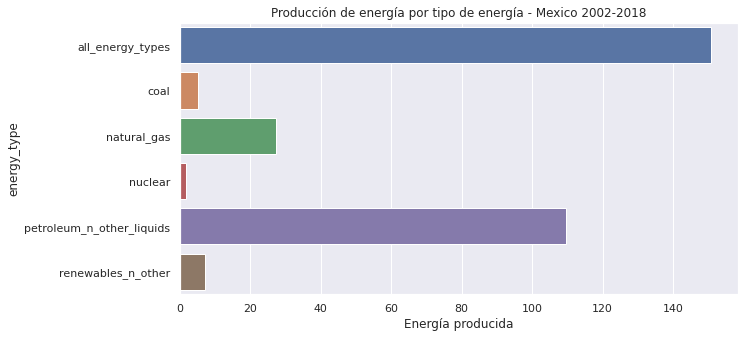

In [108]:
#Producción de energía
ax = sns.barplot(x=tipos_energia_Mexico['energy_production'], y=tipos_energia_Mexico.index, orient='h')
ax.set_title('Producción de energía por tipo de energía - Mexico 2002-2018')
ax.set(xlabel='Energía producida');

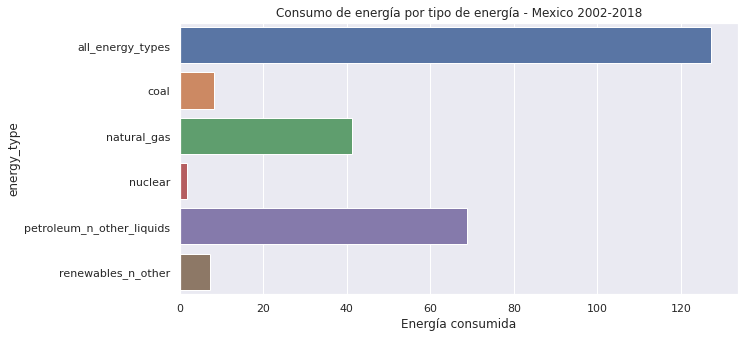

In [109]:
#Consumo de energía
ax = sns.barplot(x=tipos_energia_Mexico['energy_consumption'], y=tipos_energia_Mexico.index, orient='h')
ax.set_title('Consumo de energía por tipo de energía - Mexico 2002-2018')
ax.set(xlabel='Energía consumida');

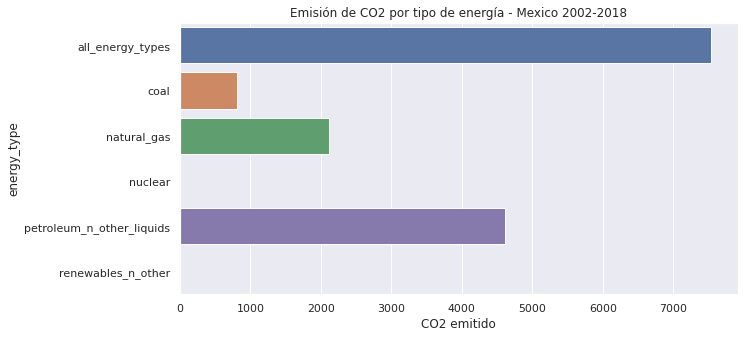

In [110]:
#Emisión de CO2
ax = sns.barplot(x=tipos_energia_Mexico['co2_emission'], y=tipos_energia_Mexico.index, orient='h')
ax.set_title('Emisión de CO2 por tipo de energía - Mexico 2002-2018')
ax.set(xlabel='CO2 emitido');

Vemos que en estos años la principal fuente de energía en México ha sido el petróleo. Algo importante a notar es que una buena parte de la energía consumida en nuestro país no se genera aquí, sino que se obtiene de algún otro país. 

Observemos mediante violinplots la distribución del consumo de energía por país en estos años, separado por tipo de energía:

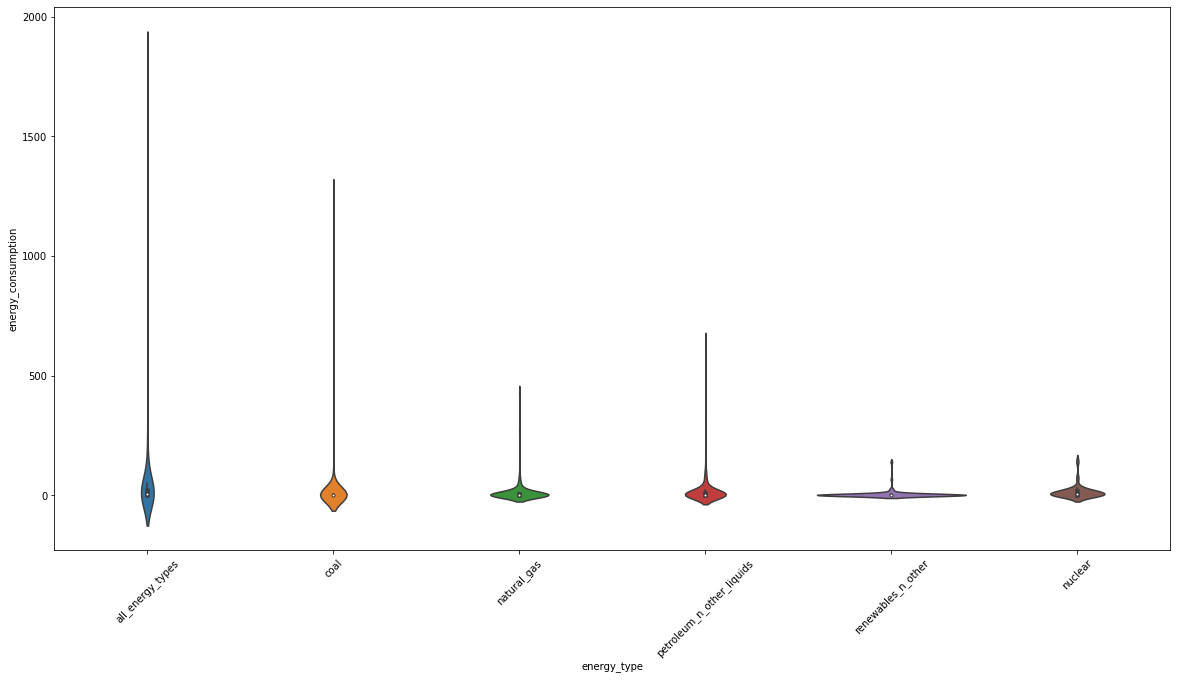

In [ ]:
#Con los violinplots es más claro la menor dispersión de los datos para energía renovable y nuclear
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
sns.violinplot(data=df_por_pais_y_tipo_columnas, x='energy_type', y='energy_consumption');

De esto podemos rescatar que para energía nuclear y renovable no hay una gran cantidad de valores atípicos, en contraste con el resto de eneergías. Algo deseable sería que esos países que consumen cantidades enormes y atípicas de energía aumenten de forma importante su consumo de fuentes renovables.

# Conclusiones

Con base en las respuestas obtenidas podemos concluir que los países que mayor consumen resultan ser los mayores productores de energía y también aquellos con una densidad demográfica superior, en consecuencia, emiten la mayor cantidad de gases de efecto invernadero.

Así mismo observamos que la mayoría de la energía consumida a nivel global se concentra únicamente en 5 países. Es imperante que este pequeño grupo de países reduzca sus niveles de consumo y emisiones para mitigar el efecto invernadero en los próximos años.

En contraste, hay una tendencia a la disminución de la emisión de CO2 en los países que más producen energías limpias. Sin embargo, sigue observándose que la capacidad de producción enérgitica mediante el uso de energías o combustibles renovables es inferior a las energías no renovables.

Nuestro país tiene una dependencia energética importante, que se ve reflejada en la diferencia entre la energía que consumimos y la que producimo. Además, principalmente utilizamos petróleo y gas natural, ambos siendo fuentes importantes de CO2. Aumentar nuestra producción de energía renovable no solo disminuiría nuestra dependencia energética, sino que también reduciría nuestras emisiones de CO2.

---
# Problemas que surgieron en el desarrollo

Durante el desarrollo de este trabajo nos encontramos con distintos retos para poder contestar las preguntas que nos planteamos:


* En algunos datasets, dado que eran datos históricos los nombres de algunos países cambiaron a lo largo de los años.
  * Analizamos para los países de interés las diferentes instancias en los datasets, homologándolas al nombre del país actual. 
* Entre distintos datasets, y para la herramienta utilizada para producir el mapa, los nombres de algunos países no coincidían.
  * Al igual que en el punto anterior, se homologaron los nombres según fue necesario.
* En nuestro dataset no tenemos secciones de texto para análizar, por lo que no realizamos análisis de lenguaje natural.
* Como no tenemos una variable binaria, no realizamos el postwork de Machine Learning. 




